# DATA SCIENCE CLIENT PROJECT ON BANK GOOD CREDIT

## DATA COLLECTION: DATA PROVIDED BY DATAMITES FOR CAPSTONE PROJECT

## BUISNESS CASE :-  
  *  **Bank GoodCredit wants to predict cred score for current credit card customers. The cred score will denote a customer’s credit worthiness and help the bank in reducing credit default risk.**
  
### Target variable → Bad_label
### 0 – Customer has Good credit history
### 1 – Customer has Bad credit history

## Domain Analysis :

#### Credit card : A credit card is a financial instrument, which can be used more than once to borrow money or buy products and services on credit. Banks, retail stores and other businesses generally issue these.
#### Credit limit : The maximum amount of charges a card holder may apply to the account.
####  Cash Limit : The cash advance limit is the amount you can withdraw using your Credit Card. 
####  Annual Fee : A bank charge for use of a credit card levied each year, which ranges depending upon the type of card one possesses. Banks sually take an initial fixed amount in the first year and thena lower amount as yearly renewal fees. Revolving Line Of Credit.



## Importing necessary libraries

In [1]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import os

# To avoid warnings
import warnings
warnings.filterwarnings("ignore")

## Making connections to database server

In [3]:
# making connections to database server
connection = mysql.connector.connect(host ='18.136.157.135', # IP-address of data-base
                                    user ='dm_team1', # data-base Username
                                    password ='DM!$Team&279@20!',
                                    database ='project_banking') # data-base Password

In [4]:
connection

In [5]:
# Check the number of databases available on the server
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_banking',)


In [6]:
database_tables=pd.read_sql_query('show tables',connection)
print(database_tables)

  Tables_in_project_banking
0              Cust_Account
1         Cust_Demographics
2              Cust_Enquiry


## CUSTOMER ACCOUNT TABLE

In [7]:
query_1='select *from Cust_Account'
d=pd.read_sql(query_1,connection)
pd.set_option('display.max_columns',None)
print(d.shape)
d.head()

(186329, 21)


,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900,0,,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",,01-Sep-15,01-Jul-14,,,,,
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,,03-Oct-15,16201,10390,,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000,1400,,3,5603
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,,30-Sep-15,41028,34420,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,,,,,
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,,26-Jul-07,31-Jan-09,93473,0,,"""""""1200900600600600300000000000000000000000000...",,01-Jul-07,01-Feb-06,,,,,
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,,31-May-15,20250,13500,,"""""""000000000000000""""""",,01-May-15,01-Jan-15,,,,,


In [8]:
## taking necessary columns 

acc_columns = ['customer_no','high_credit_amt','cur_balance_amt','cashlimit','creditlimit']
data_acc = d.loc[:,acc_columns]
data_acc.head()

,customer_no,high_credit_amt,cur_balance_amt,cashlimit,creditlimit
0,12265,20900,0,,
1,12265,16201,10390,1400,14000
2,12265,41028,34420,,
3,15606,93473,0,,
4,15606,20250,13500,,


In [9]:
acc_group = data_acc.groupby(['customer_no']) ## grouping the data by customer number


In [10]:
acc_group.head()

,customer_no,high_credit_amt,cur_balance_amt,cashlimit,creditlimit
0,12265,20900,0,,
1,12265,16201,10390,1400,14000
2,12265,41028,34420,,
3,15606,93473,0,,
4,15606,20250,13500,,
...,...,...,...,...,...
186317,1611,97741,0,,
186318,1611,300000,287017,,
186319,1611,34001,0,,
186320,1611,42320,0,,42490


In [11]:
account = pd.DataFrame(acc_group.sum()).reset_index()
account.head()

,customer_no,high_credit_amt,cur_balance_amt,cashlimit,creditlimit
0,1,2528846125459139765171256290596200000020000009...,2528846588820003759832549017546780000093630000,168000,250000420000
1,10,1111113565675230005500000531458600000111851500...,068994000178725000000,243000,405000
2,100,747754333541229800010000454945000034240350000,3970033460980316015530000,980017700,300009800059000
3,1000,548289548289147688,31349029113,6750081000,225000270000
4,10000,52590480000562501997410200520000,1752758222031250-26123003454770,10000,60000


In [12]:
account.shape

(23896, 5)

In [13]:
account.to_csv('Cust_Account_data.csv',index=False)  ## converting data to csv 

## CUSTOMER ENQUIRY DATA 

In [14]:
query_3 = 'select *from Cust_Enquiry'
d2= pd.read_sql(query_3,connection)
pd.set_option('display.max_columns',None)
print(d2.shape)
d2.head()

(413188, 6)


,dt_opened,customer_no,upload_dt,enquiry_dt,enq_purpose,enq_amt
0,18-Apr-15,1,21-Apr-15,19-Dec-14,2,3500000
1,18-Apr-15,1,21-Apr-15,05-Mar-14,5,500000
2,18-Apr-15,1,21-Apr-15,05-Mar-14,0,50000
3,18-Apr-15,1,21-Apr-15,22-Feb-14,10,50000
4,18-Apr-15,1,21-Apr-15,11-Jun-13,10,1000


In [15]:
## taking necessary columns 
d_enquiry=d2.loc[:,['customer_no','enq_amt']]
d_enquiry.head()

,customer_no,enq_amt
0,1,3500000
1,1,500000
2,1,50000
3,1,50000
4,1,1000


In [16]:
enquiry_group = d_enquiry.groupby(['customer_no'])
enquiry_group.head()


,customer_no,enq_amt
0,1,3500000
1,1,500000
2,1,50000
3,1,50000
4,1,1000
...,...,...
413172,23896,10000
413173,23896,1000
413174,23896,15000
413175,23896,1000


In [17]:
enquiry_data_count = pd.DataFrame(enquiry_group.count()).reset_index()
enquiry_data_count.columns = ['customer_no','total_enq_count']
enquiry_data_count.head(5)

,customer_no,total_enq_count
0,1,18
1,10,21
2,100,19
3,1000,10
4,10000,14


In [18]:
enquiry_data_amt=pd.DataFrame(enquiry_group.sum()).reset_index()
enquiry_data_amt.columns = ['customer_no','total_enq_amt']
enquiry_data_amt.head(5)

,customer_no,total_enq_amt
0,1,3500000500000500005000010001000100010001000150...
1,10,2000000200000002000000055000005500000100050000...
2,100,5000010000110000130000030000040000010000100001...
3,1000,10000100010000100001000050000500005000010001000
4,10000,9000200002220005000010000050000500005000056250...


In [19]:
enquiry_data_amt.shape

(23896, 2)

In [20]:
enquiry_data =pd.merge(enquiry_data_count,enquiry_data_amt,on='customer_no',how='inner')
enquiry_data.head()

,customer_no,total_enq_count,total_enq_amt
0,1,18,3500000500000500005000010001000100010001000150...
1,10,21,2000000200000002000000055000005500000100050000...
2,100,19,5000010000110000130000030000040000010000100001...
3,1000,10,10000100010000100001000050000500005000010001000
4,10000,14,9000200002220005000010000050000500005000056250...


In [21]:
enquiry_data.to_csv('Cust_enquiry_data.csv',index=False)

## CUSTOMER DEMOGRAPHIC  DATA 

In [22]:
query_2 = 'select *from Cust_Demographics'
d3=pd.read_sql(query_2,connection)
pd.set_option('display.max_columns',None)
print(d3.shape)
d3.head()

(23896, 83)


,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,,,,Y,IS1,,0,159,4284,4284,,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,,Y,Y,N,,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,,,0000-00-00,0,98332XXXXX,1,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,,,,Y,IS1,,0,91,B001,4077,,1,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,17,,Y,Y,N,,Y,1969-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,99455XXXXX,1,N,0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,,,,Y,IS1,,0,91,B001,4077,,2,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AFAPNXXXXX,,,N,,0,,17-Jun-16,3,17,,N,Y,N,,Y,1966-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,98456XXXXX,1,N,0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,,,,Y,IS1,,0,157,5107,5107,,1,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,,Y,HDFC Bank,0,,17-Jun-16,1,21,,Y,Y,N,,Y,1988-0,21,16,411001,0,2,100000,Nov-00,21,R,,,6/15/65,1,98220XXXXX,1,N,0
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,,,,Y,IS1,,0,100,D016,4564,,1,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,13,,Y,Y,N,,Y,1995-0,13,3,122009,0,2,300000,Nov-00,13,R,,,0000-00-00,0,98111XXXXX,1,N,0


In [23]:
d3.to_csv('Cust_Demographics_data.csv',index=False)

In [24]:
data_merge=pd.merge(d3,account,on='customer_no', how='inner')
print(data_merge.shape)
data_merge.head()

(23896, 87)


,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,cashlimit,creditlimit
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,,,,Y,IS1,,0,159,4284,4284,,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,,Y,Y,N,,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,,,0000-00-00,0,98332XXXXX,1,N,0,2528846125459139765171256290596200000020000009...,2528846588820003759832549017546780000093630000,168000,250000420000
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,,,,Y,IS1,,0,91,B001,4077,,1,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,17,,Y,Y,N,,Y,1969-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,99455XXXXX,1,N,0,1000000117595,674724007,1,1000000
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,,,,Y,IS1,,0,91,B001,4077,,2,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AFAPNXXXXX,,,N,,0,,17-Jun-16,3,17,,N,Y,N,,Y,1966-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,98456XXXXX,1,N,0,121523,17864,,
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,,,,Y,IS1,,0,157,5107,5107,,1,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,,Y,HDFC Bank,0,,17-Jun-16,1,21,,Y,Y,N,,Y,1988-0,21,16,411001,0,2,100000,Nov-00,21,R,,,6/15/65,1,98220XXXXX,1,N,0,4449180000050000011650007500003000000300000056...,0163749600000086886-2121189000000,23600010500020000,394000262000300000
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,,,,Y,IS1,,0,100,D016,4564,,1,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,13,,Y,Y,N,,Y,1995-0,13,3,122009,0,2,300000,Nov-00,13,R,,,0000-00-00,0,98111XXXXX,1,N,0,1501591266293822042204,7973000000,,


In [25]:
data=pd.concat([data_merge,enquiry_data],axis=1)
print(data.shape)
data.head()

(23896, 90)


,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,cashlimit,creditlimit,customer_no,total_enq_count,total_enq_amt
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,,,,Y,IS1,,0,159,4284,4284,,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,,Y,Y,N,,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,,,0000-00-00,0,98332XXXXX,1,N,0,2528846125459139765171256290596200000020000009...,2528846588820003759832549017546780000093630000,168000,250000420000,1,18,3500000500000500005000010001000100010001000150...
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,,,,Y,IS1,,0,91,B001,4077,,1,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,17,,Y,Y,N,,Y,1969-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,99455XXXXX,1,N,0,1000000117595,674724007,1,1000000,10,21,2000000200000002000000055000005500000100050000...
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,,,,Y,IS1,,0,91,B001,4077,,2,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AFAPNXXXXX,,,N,,0,,17-Jun-16,3,17,,N,Y,N,,Y,1966-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,98456XXXXX,1,N,0,121523,17864,,,100,19,5000010000110000130000030000040000010000100001...
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,,,,Y,IS1,,0,157,5107,5107,,1,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,,Y,HDFC Bank,0,,17-Jun-16,1,21,,Y,Y,N,,Y,1988-0,21,16,411001,0,2,100000,Nov-00,21,R,,,6/15/65,1,98220XXXXX,1,N,0,4449180000050000011650007500003000000300000056...,0163749600000086886-2121189000000,23600010500020000,394000262000300000,1000,10,10000100010000100001000050000500005000010001000
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,,,,Y,IS1,,0,100,D016,4564,,1,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,13,,Y,Y,N,,Y,1995-0,13,3,122009,0,2,300000,Nov-00,13,R,,,0000-00-00,0,98111XXXXX,1,N,0,1501591266293822042204,7973000000,,,10000,14,9000200002220005000010000050000500005000056250...


In [26]:
## Converting data to csv
data.to_csv('Bank_GoodCredit_data.csv')

In [27]:
data=pd.read_csv('Bank_GoodCredit_data.csv')

In [28]:
# dataframe storage reduction
#inspired from git hub in order to reduce ram usage 
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [29]:
import numpy as np
data = reduce_mem_usage(data)

Memory usage of dataframe is 16.59 MB
Memory usage after optimization is: 8.14 MB
Decreased by 50.9%


In [30]:
data.head()

,Unnamed: 0,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,cashlimit,creditlimit,customer_no.1,total_enq_count,total_enq_amt
0,0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650.0,2.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,159,4284,4284,NaN,1.0,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1.0,2.0,NaN,Mumbai / Navi Mumbai / Thane,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Mumbai,400059.0,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,NaN,Y,State Bank of India,0.0,01-Jun-13,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1965-0,21.0,15.0,400610.0,0.0,2.0,90000.0,Nov-00,21.0,R,NaN,NaN,0000-00-00,0.0,98332XXXXX,1.0,N,0,2528846125459139765171256290596200000020000009...,2528846588820003759832549017546780000093630000,168000,250000420000,1,18,3500000500000500005000010001000100010001000150...
1,1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760.0,1.0,Card Setup,14.0,1200000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,91,B001,4077,NaN,1.0,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1.0,2.0,NaN,Bengaluru,560042.0,1969.0,0.0,Self,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,NaN,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,17.0,NaN,Y,Y,N,NaN,Y,1969-0,17.0,12.0,560042.0,0.0,2.0,1.0,Nov-00,17.0,R,NaN,NaN,0000-00-00,0.0,99455XXXXX,1.0,N,0,1000000117595,674724007,1,1000000,10,21,2000000200000002000000055000005500000100050000...
2,2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774.0,1.0,Card Setup,14.0,700000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,91,B001,4077,NaN,2.0,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1.0,0.0,NaN,Bengaluru,560042.0,1966.0,0.0,Self,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,NaN,PAN Card,AFAPNXXXXX,NaN,NaN,N,NaN,0.0,NaN,17-Jun-16,3.0,17.0,NaN,N,Y,N,NaN,Y,1966-0,17.0,12.0,560042.0,0.0,2.0,1.0,Nov-00,17.0,R,NaN,NaN,0000-00-00,0.0,98456XXXXX,1.0,N,0,121523,17864,NaN,NaN,100,19,5000010000110000130000030000040000010000100001...
3,3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770.0,1.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,157,5107,5107,NaN,1.0,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1.0,3.0,NaN,Pune,411001.0,1988.0,0.0,Self,Y,2.0,100000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Pune,411026.0,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,NaN,Y,HDFC Bank,0.0,NaN,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1988-0,21.0,16.0,411001.0,0.0,2.0,100000.0,Nov-00,21.0,R,NaN,NaN,6/15/65,1.0,98220XXXXX,1.0,N,0,4449180000050000011650007500003000000300000056...,0163749600000086886-2121189000000,23600010500020000,394000262000300000,1000,10,10000100010000100001000050000500005000010001000
4,4,06-May-15,5,30-Apr-15,Insignia,NaN,NaN,3.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,100,D016,4564,NaN,1.0,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1.0,3.0,NaN,Gurgaon,122009.0,1995.0,0.0,Self,Y,2.0,300000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Gurgaon,122009.0,NaN,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,13.0,NaN,Y,Y,N,NaN,Y,1995-0,13.0,3.0,122009.0,0.0,2.0,300000.0,Nov-00,13.0,R,NaN,NaN,0000-00-00,0.0,98111XXXXX,1.0,N,0,1501591266293822042204,7973000000,NaN,NaN,10000,14,900

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 91 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Unnamed: 0       23896 non-null  int16   
 1   dt_opened        23896 non-null  category
 2   customer_no      23896 non-null  int16   
 3   entry_time       23881 non-null  category
 4   feature_1        23881 non-null  category
 5   feature_2        21060 non-null  category
 6   feature_3        21060 non-null  float16 
 7   feature_4        23881 non-null  float16 
 8   feature_5        23881 non-null  category
 9   feature_6        23881 non-null  float16 
 10  feature_7        23881 non-null  float32 
 11  feature_8        1261 non-null   category
 12  feature_9        1261 non-null   category
 13  feature_10       51 non-null     category
 14  feature_11       23881 non-null  category
 15  feature_12       23881 non-null  category
 16  feature_13       10892 non-null  categor

In [32]:
data.describe()

,Unnamed: 0,customer_no,feature_3,feature_4,feature_6,feature_7,feature_14,feature_19,feature_25,feature_26,feature_29,feature_30,feature_31,feature_34,feature_35,feature_39,feature_40,feature_41,feature_42,feature_44,feature_49,feature_52,feature_55,feature_56,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_74,feature_76,feature_78,Bad_label,customer_no.1,total_enq_count
count,23896.000000,23896.000000,21060.0,23881.000000,2.388100e+04,2.388100e+04,16163.000,23881.000000,23881.000000,23881.000000,23881.000000,2.388100e+04,23881.000000,23881.000000,2.388100e+04,23881.0,2.388100e+04,2.388100e+04,23881.000000,23881.00000,1.040000e+02,2.388100e+04,23881.000000,23881.00000,2.388100e+04,23881.0,23881.000000,23881.000000,23881.000000,2.388100e+04,2.388100e+04,17.000000,23881.000000,23881.000000,23896.000000,23896.000000,23896.000000
mean,11947.500000,11948.500000,inf,2.322266,inf,1.190714e+05,inf,1.049805,1.234375,0.725586,217629.046875,inf,0.652344,1.239258,3.278937e+04,inf,inf,inf,0.154053,222253.56250,2.724313e+11,6.500120e+04,1.085938,inf,inf,inf,264381.000000,0.184448,1.239258,3.278937e+04,inf,2.412109,0.003853,1.042969,0.042015,11948.500000,17.291095
std,6898.325352,6898.325352,inf,0.893066,7.812500e-03,7.752380e+04,5.625,0.216675,0.423096,1.125000,159266.890625,1.199219e+01,2.341797,0.429932,1.087834e+05,inf,3.587891e+00,4.160156e+00,0.930664,156848.15625,1.223113e+11,1.008261e+05,0.388672,8.28125,9.515625e+00,inf,202004.578125,0.387695,0.429932,1.087834e+05,9.078125e+00,0.618164,0.084290,0.224731,0.200628,6898.325352,15.248175
min,0.000000,1.000000,-1.0,1.000000,1.400000e+01,0.000000e+00,0.000,1.000000,1.000000,0.000000,110001.000000,1.964000e+03,0.000000,1.000000,1.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.00000,7.568570e+05,0.000000e+00,1.000000,2.00000,2.000000e+00,1.0,110001.000000,0.000000,1.000000,1.000000e+00,2.000000e+00,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,5973.750000,5974.750000,698.0,1.000000,1.400000e+01,7.200000e+04,0.000,1.000000,1.000000,0.000000,110051.000000,1.991000e+03,0.000000,1.000000,1.000000e+00,1999.0,0.000000e+00,1.000000e+00,0.000000,110044.00000,3.090000e+11,0.000000e+00,1.000000,10.00000,1.000000e+01,39.0,110059.000000,0.000000,1.000000,1.000000e+00,1.000000e+01,2.000000,0.000000,1.000000,0.000000,5974.750000,7.000000
50%,11947.500000,11948.500000,721.0,3.000000,1.400000e+01,1.040000e+05,12.000,1.000000,1.000000,0.000000,110094.000000,2.005000e+03,0.000000,1.000000,3.000000e+04,2010.0,2.000000e+00,6.000000e+00,0.000000,122001.00000,3.090000e+11,5.000000e+04,1.000000,10.00000,1.000000e+01,157.0,122012.000000,0.000000,1.000000,3.000000e+04,1.000000e+01,2.000000,0.000000,1.000000,0.000000,11948.500000,13.000000
75%,17921.250000,17922.250000,745.0,3.000000,1.400000e+01,1.390000e+05,12.000,1.000000,1.000000,2.000000,390002.000000,2.011000e+03,0.000000,1.000000,4.300000e+04,2013.0,6.000000e+00,1.000000e+01,0.000000,390002.00000,3.090000e+11,1.000000e+05,1.000000,13.00000,2.100000e+01,157.0,400601.000000,0.000000,1.000000,4.300000e+04,1.700000e+01,3.000000,0.000000,1.000000,0.000000,17922.250000,23.000000
max,23895.000000,23896.000000,896.0,3.000000,1.400000e+01,1.217000e+06,12.000,2.000000,2.000000,10.000000,712245.000000,2.015000e+03,12.000000,3.000000,1.500000e+07,2015.0,1.200000e+01,1.100000e+01,11.000000,712201.00000,8.090000e+11,3.777000e+06,4.000000,35.00000,3.500000e+01,10008.0,874401.000000,1.000000,3.000000,1.500000e+07,3.500000e+01,4.000000,4.000000,3.000000,1.000000,23896.000000,308.000000


## Checking Null Values 

In [33]:
data.isnull().sum()

Unnamed: 0            0
dt_opened             0
customer_no           0
entry_time           15
feature_1            15
                   ... 
cashlimit          5461
creditlimit        4024
customer_no.1         0
total_enq_count       0
total_enq_amt       109
Length: 91, dtype: int64

In [34]:
#Create function to check missing value with percentage
pd.set_option('display.max_rows',None)
def missing_value(data):
    null_value = data.isnull().sum()
    percentage = (data.isnull().sum()/data.isnull().count()*100)
    null_value = pd.concat([null_value,percentage],axis=1,keys=['Missing Number','Missing Percentage'])
    return null_value
missing_value(data)

,Missing Number,Missing Percentage
Unnamed: 0,0,0.000000
dt_opened,0,0.000000
customer_no,0,0.000000
entry_time,15,0.062772
feature_1,15,0.062772
feature_2,2836,11.868095
feature_3,2836,11.868095
feature_4,15,0.062772
feature_5,15,0.062772
feature_6,15,0.062772


In [35]:
## dropping unnecessary , constant columns and columns that have more than 80% null values 

data.drop(['Unnamed: 0','dt_opened', 'entry_time','feature_5','feature_8','feature_9','feature_10','feature_13','feature_16','feature_17','feature_18',
           'feature_38','feature_20','feature_22','feature_47','feature_45','feature_49','feature_51','feature_53','feature_54','feature_57',
           'feature_61','feature_73','feature_74', 'feature_77', 'customer_no.1'],axis=1, inplace=True)

### Since the data is too large , the data is split into numeric and categrical data and then performed data pre processing on these data sets

In [36]:
## Splitting the data into numeric and categorical_data

numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])

## DATA PREPROCESSING : A) Numerical Data

In [37]:
numeric_data.columns 

Index(['customer_no', 'feature_3', 'feature_4', 'feature_6', 'feature_7',
       'feature_14', 'feature_19', 'feature_25', 'feature_26', 'feature_29',
       'feature_30', 'feature_31', 'feature_34', 'feature_35', 'feature_39',
       'feature_40', 'feature_41', 'feature_42', 'feature_44', 'feature_52',
       'feature_55', 'feature_56', 'feature_64', 'feature_65', 'feature_66',
       'feature_67', 'feature_68', 'feature_69', 'feature_71', 'feature_76',
       'feature_78', 'Bad_label', 'total_enq_count'],
      dtype='object')

In [38]:
numeric_data.drop(['Bad_label'],axis=1,inplace=True)

In [39]:
## checking null values in numeric data 
## calling missing value function
missing_value(numeric_data)

,Missing Number,Missing Percentage
customer_no,0,0.000000
feature_3,2836,11.868095
feature_4,15,0.062772
feature_6,15,0.062772
feature_7,15,0.062772
feature_14,7733,32.361065
feature_19,15,0.062772
feature_25,15,0.062772
feature_26,15,0.062772
feature_29,15,0.062772


### As we can see that there are many missing values , we will make use of Simple imputer 

In [40]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy ='median')
imp=imp.fit(numeric_data)

In [41]:
numeric_data = imp.transform(numeric_data)

In [42]:
numeric_data   ## this is array of transformed numeric data after imputation

array([[1.0000e+00, 6.5000e+02, 2.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        1.8000e+01],
       [2.0000e+00, 7.6000e+02, 1.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.1000e+01],
       [3.0000e+00, 7.7400e+02, 1.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        1.9000e+01],
       ...,
       [2.3894e+04, 7.4800e+02, 3.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        1.7000e+01],
       [2.3895e+04, 7.4000e+02, 3.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        6.0000e+00],
       [2.3896e+04, 6.8800e+02, 1.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        1.4000e+01]], dtype=float32)

In [43]:
nd=pd.DataFrame(numeric_data)    ## converting array into DataFrame

In [44]:
nd.columns=['customer_no', 'feature_3', 'feature_4', 'feature_6', 'feature_7',
       'feature_14', 'feature_19', 'feature_25', 'feature_26', 'feature_29',
       'feature_30', 'feature_31', 'feature_34', 'feature_35', 'feature_39',
       'feature_40', 'feature_41', 'feature_42', 'feature_44', 'feature_52',
       'feature_55', 'feature_56', 'feature_64', 'feature_65', 'feature_66',
       'feature_67', 'feature_68', 'feature_69', 'feature_71', 'feature_76',
       'feature_78', 'total_enq_count']
nd.head()

,customer_no,feature_3,feature_4,feature_6,feature_7,feature_14,feature_19,feature_25,feature_26,feature_29,feature_30,feature_31,feature_34,feature_35,feature_39,feature_40,feature_41,feature_42,feature_44,feature_52,feature_55,feature_56,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_76,feature_78,total_enq_count
0,1.0,650.0,2.0,14.0,500000.0,0.0,1.0,1.0,2.0,400610.0,1965.0,0.0,2.0,90000.0,0.0,0.0,0.0,0.0,400059.0,0.0,1.0,21.0,21.0,15.0,400610.0,0.0,2.0,90000.0,21.0,0.0,1.0,18.0
1,2.0,760.0,1.0,14.0,1200000.0,0.0,1.0,1.0,2.0,560042.0,1969.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,560042.0,0.0,1.0,17.0,17.0,12.0,560042.0,0.0,2.0,1.0,17.0,0.0,1.0,21.0
2,3.0,774.0,1.0,14.0,700000.0,0.0,2.0,1.0,0.0,560042.0,1966.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,560042.0,0.0,3.0,17.0,17.0,12.0,560042.0,0.0,2.0,1.0,17.0,0.0,1.0,19.0
3,4.0,770.0,1.0,14.0,500000.0,0.0,1.0,1.0,3.0,411001.0,1988.0,0.0,2.0,100000.0,0.0,0.0,0.0,0.0,411026.0,0.0,1.0,21.0,21.0,16.0,411001.0,0.0,2.0,100000.0,21.0,1.0,1.0,10.0
4,5.0,721.0,3.0,14.0,500000.0,0.0,1.0,1.0,3.0,122009.0,1995.0,0.0,2.0,300000.0,0.0,0.0,0.0,0.0,122009.0,0.0,1.0,13.0,13.0,3.0,122009.0,0.0,2.0,300000.0,13.0,0.0,1.0,14.0


In [45]:
missing_value(nd)

,Missing Number,Missing Percentage
customer_no,0,0.0
feature_3,0,0.0
feature_4,0,0.0
feature_6,0,0.0
feature_7,0,0.0
feature_14,0,0.0
feature_19,0,0.0
feature_25,0,0.0
feature_26,0,0.0
feature_29,0,0.0


### There are no missing values in numerical data.

## DATA PREPROCESSING : B) CATEGORICAL COLUMNS 

In [46]:
categorical_data.head()

,feature_1,feature_2,feature_11,feature_12,feature_15,feature_21,feature_23,feature_24,feature_27,feature_28,feature_32,feature_33,feature_36,feature_37,feature_43,feature_46,feature_48,feature_50,feature_58,feature_59,feature_60,feature_62,feature_63,feature_70,feature_72,feature_75,feature_79,high_credit_amt,cur_balance_amt,cashlimit,creditlimit,total_enq_amt
0,Insignia,13-Apr-15,Y,IS1,159,03-Sep-65,N,@REDIFFMAIL.COM,NaN,Mumbai / Navi Mumbai / Thane,Self,Y,NaN,NaN,Mumbai,PAN Card,The Ratnakar Bank Ltd.,Y,Y,Y,N,Y,1965-0,Nov-00,R,0000-00-00,N,2528846125459139765171256290596200000020000009...,2528846588820003759832549017546780000093630000,168000,250000420000,3500000500000500005000010001000100010001000150...
1,Insignia,21-Apr-15,Y,IS1,91,14-Jul-62,N,@GMAIL.COM,NaN,Bengaluru,Self,Y,NaN,NaN,Bangalore,PAN Card,The Ratnakar Bank Ltd.,N,Y,Y,N,Y,1969-0,Nov-00,R,0000-00-00,N,1000000117595,674724007,1,1000000,2000000200000002000000055000005500000100050000...
2,Insignia,21-Apr-15,Y,IS1,91,10-Apr-66,N,@SHOBANARAYAN.COM,NaN,Bengaluru,Self,Y,NaN,NaN,Bangalore,PAN Card,NaN,N,N,Y,N,Y,1966-0,Nov-00,R,0000-00-00,N,121523,17864,NaN,NaN,5000010000110000130000030000040000010000100001...
3,Insignia,20-Apr-15,Y,IS1,157,16-Apr-64,N,@VSNL.COM,NaN,Pune,Self,Y,NaN,NaN,Pune,PAN Card,The Ratnakar Bank Ltd.,Y,Y,Y,N,Y,1988-0,Nov-00,R,6/15/65,N,4449180000050000011650007500003000000300000056...,0163749600000086886-2121189000000,23600010500020000,394000262000300000,10000100010000100001000050000500005000010001000
4,Insignia,NaN,Y,IS1,100,03-Jan-54,N,@REDIFFMAIL.COM,NaN,Gurgaon,Self,Y,NaN,NaN,Gurgaon,PAN Card,The Ratnakar Bank Ltd.,N,Y,Y,N,Y,1995-0,Nov-00,R,0000-00-00,N,1501591266293822042204,7973000000,NaN,NaN,9000200002220005000010000050000500005000056250...


In [47]:
categorical_data.columns

Index(['feature_1', 'feature_2', 'feature_11', 'feature_12', 'feature_15',
       'feature_21', 'feature_23', 'feature_24', 'feature_27', 'feature_28',
       'feature_32', 'feature_33', 'feature_36', 'feature_37', 'feature_43',
       'feature_46', 'feature_48', 'feature_50', 'feature_58', 'feature_59',
       'feature_60', 'feature_62', 'feature_63', 'feature_70', 'feature_72',
       'feature_75', 'feature_79', 'high_credit_amt', 'cur_balance_amt',
       'cashlimit', 'creditlimit', 'total_enq_amt'],
      dtype='object')

In [48]:
## Calling function to check missing value of categorical data
missing_value(categorical_data)

,Missing Number,Missing Percentage
feature_1,15,0.062772
feature_2,2836,11.868095
feature_11,15,0.062772
feature_12,15,0.062772
feature_15,23,0.096250
feature_21,15,0.062772
feature_23,15,0.062772
feature_24,640,2.678273
feature_27,3637,15.220121
feature_28,15,0.062772


### As we can see that there are many missing values , we will make use of Simple imputer

In [49]:
## Imputing null values 

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
imp=imp.fit(categorical_data) 


In [50]:
categorical_data = imp.transform(categorical_data)   ## this is array of transformed numeric data after imputation

In [51]:
categorical_data      

array([['Insignia', '13-Apr-15', 'Y', ..., '168000', '250000420000',
        '3500000500000500005000010001000100010001000150500001000003000005000050000100025000300000'],
       ['Insignia', '21-Apr-15', 'Y', ..., '1', '1000000',
        '200000020000000200000005500000550000010005000010000000146667500001000500005000010005000000050000010000523000100005000050000'],
       ['Insignia', '21-Apr-15', 'Y', ..., '10000', '50000',
        '500001000011000013000003000004000001000010000100037000350000200000225000300000120001200010000500001'],
       ...,
       ['Platinum Maxima', '24-Sep-15', 'Y', ..., '7000', '14000',
        '1000050000150005000015000970005000010001500001000100010001000500001000300000'],
       ['Platinum Deligh', '30-Sep-15', 'Y', ..., '2970010000',
        '9900065000', '50000500005000050000500001000'],
       ['Titanium Deligh', '06-Nov-15', 'Y', ..., '212004200',
        '10600042000',
        '500001000050000100000150005000010000100050000500001000500002500050000']],
     

In [52]:
cd=pd.DataFrame(categorical_data )      ## converting array into dataframe

In [53]:
missing_value(cd)

,Missing Number,Missing Percentage
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
5,0,0.0
6,0,0.0
7,0,0.0
8,0,0.0
9,0,0.0


### Now, there are no missing values in categorical data

In [54]:
cd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,Insignia,13-Apr-15,Y,IS1,159,03-Sep-65,N,@REDIFFMAIL.COM,Graduate,Mumbai / Navi Mumbai / Thane,Self,Y,Private Ltd. Co.,Banking/Financial Services,Mumbai,PAN Card,The Ratnakar Bank Ltd.,Y,Y,Y,N,Y,1965-0,Nov-00,R,0000-00-00,N,2528846125459139765171256290596200000020000009...,2528846588820003759832549017546780000093630000,168000,250000420000,3500000500000500005000010001000100010001000150...
1,Insignia,21-Apr-15,Y,IS1,91,14-Jul-62,N,@GMAIL.COM,Graduate,Bengaluru,Self,Y,Private Ltd. Co.,Banking/Financial Services,Bangalore,PAN Card,The Ratnakar Bank Ltd.,N,Y,Y,N,Y,1969-0,Nov-00,R,0000-00-00,N,1000000117595,674724007,1,1000000,2000000200000002000000055000005500000100050000...
2,Insignia,21-Apr-15,Y,IS1,91,10-Apr-66,N,@SHOBANARAYAN.COM,Graduate,Bengaluru,Self,Y,Private Ltd. Co.,Banking/Financial Services,Bangalore,PAN Card,HDFC Bank,N,N,Y,N,Y,1966-0,Nov-00,R,0000-00-00,N,121523,17864,10000,50000,5000010000110000130000030000040000010000100001...
3,Insignia,20-Apr-15,Y,IS1,157,16-Apr-64,N,@VSNL.COM,Graduate,Pune,Self,Y,Private Ltd. Co.,Banking/Financial Services,Pune,PAN Card,The Ratnakar Bank Ltd.,Y,Y,Y,N,Y,1988-0,Nov-00,R,6/15/65,N,4449180000050000011650007500003000000300000056...,0163749600000086886-2121189000000,23600010500020000,394000262000300000,10000100010000100001000050000500005000010001000
4,Insignia,19-Oct-15,Y,IS1,100,03-Jan-54,N,@REDIFFMAIL.COM,Graduate,Gurgaon,Self,Y,Private Ltd. Co.,Banking/Financial Services,Gurgaon,PAN Card,The Ratnakar Bank Ltd.,N,Y,Y,N,Y,1995-0,Nov-00,R,0000-00-00,N,1501591266293822042204,7973000000,10000,50000,9000200002220005000010000050000500005000056250...


In [55]:
cd.columns=['feature_1', 'feature_2', 'feature_11', 'feature_12', 'feature_15',
       'feature_21', 'feature_23', 'feature_24', 'feature_27', 'feature_28',
       'feature_32', 'feature_33', 'feature_36', 'feature_37', 'feature_43',
       'feature_46', 'feature_48', 'feature_50', 'feature_58', 'feature_59',
       'feature_60', 'feature_62', 'feature_63', 'feature_70', 'feature_72',
       'feature_75', 'feature_79', 'high_credit_amt', 'cur_balance_amt',
       'cashlimit', 'creditlimit', 'total_enq_amt']

In [56]:
cd.head()

,feature_1,feature_2,feature_11,feature_12,feature_15,feature_21,feature_23,feature_24,feature_27,feature_28,feature_32,feature_33,feature_36,feature_37,feature_43,feature_46,feature_48,feature_50,feature_58,feature_59,feature_60,feature_62,feature_63,feature_70,feature_72,feature_75,feature_79,high_credit_amt,cur_balance_amt,cashlimit,creditlimit,total_enq_amt
0,Insignia,13-Apr-15,Y,IS1,159,03-Sep-65,N,@REDIFFMAIL.COM,Graduate,Mumbai / Navi Mumbai / Thane,Self,Y,Private Ltd. Co.,Banking/Financial Services,Mumbai,PAN Card,The Ratnakar Bank Ltd.,Y,Y,Y,N,Y,1965-0,Nov-00,R,0000-00-00,N,2528846125459139765171256290596200000020000009...,2528846588820003759832549017546780000093630000,168000,250000420000,3500000500000500005000010001000100010001000150...
1,Insignia,21-Apr-15,Y,IS1,91,14-Jul-62,N,@GMAIL.COM,Graduate,Bengaluru,Self,Y,Private Ltd. Co.,Banking/Financial Services,Bangalore,PAN Card,The Ratnakar Bank Ltd.,N,Y,Y,N,Y,1969-0,Nov-00,R,0000-00-00,N,1000000117595,674724007,1,1000000,2000000200000002000000055000005500000100050000...
2,Insignia,21-Apr-15,Y,IS1,91,10-Apr-66,N,@SHOBANARAYAN.COM,Graduate,Bengaluru,Self,Y,Private Ltd. Co.,Banking/Financial Services,Bangalore,PAN Card,HDFC Bank,N,N,Y,N,Y,1966-0,Nov-00,R,0000-00-00,N,121523,17864,10000,50000,5000010000110000130000030000040000010000100001...
3,Insignia,20-Apr-15,Y,IS1,157,16-Apr-64,N,@VSNL.COM,Graduate,Pune,Self,Y,Private Ltd. Co.,Banking/Financial Services,Pune,PAN Card,The Ratnakar Bank Ltd.,Y,Y,Y,N,Y,1988-0,Nov-00,R,6/15/65,N,4449180000050000011650007500003000000300000056...,0163749600000086886-2121189000000,23600010500020000,394000262000300000,10000100010000100001000050000500005000010001000
4,Insignia,19-Oct-15,Y,IS1,100,03-Jan-54,N,@REDIFFMAIL.COM,Graduate,Gurgaon,Self,Y,Private Ltd. Co.,Banking/Financial Services,Gurgaon,PAN Card,The Ratnakar Bank Ltd.,N,Y,Y,N,Y,1995-0,Nov-00,R,0000-00-00,N,1501591266293822042204,7973000000,10000,50000,9000200002220005000010000050000500005000056250...


In [57]:
category=cd[['feature_1', 'feature_2', 'feature_11', 'feature_12', 'feature_15',
       'feature_21', 'feature_23', 'feature_24', 'feature_27', 'feature_28',
       'feature_32', 'feature_33', 'feature_36', 'feature_37', 'feature_43',
       'feature_46', 'feature_48', 'feature_50', 'feature_58', 'feature_59',
       'feature_60', 'feature_62', 'feature_63', 'feature_70', 'feature_72',
       'feature_75', 'feature_79', 'high_credit_amt', 'cur_balance_amt',
       'cashlimit', 'creditlimit', 'total_enq_amt']]

## Converting categorical column to numerical column 
### For loop is used to label encode the categorical columns 

In [58]:
## as there are many columns to use label encoding , we will use for loop to label encode them 

from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

label_encoders = {}
for column in category:
    label_encoders[column] = LabelEncoder()
    cd[column] = label_encoders[column].fit_transform(cd[column]) 

In [59]:
cd.head()

,feature_1,feature_2,feature_11,feature_12,feature_15,feature_21,feature_23,feature_24,feature_27,feature_28,feature_32,feature_33,feature_36,feature_37,feature_43,feature_46,feature_48,feature_50,feature_58,feature_59,feature_60,feature_62,feature_63,feature_70,feature_72,feature_75,feature_79,high_credit_amt,cur_balance_amt,cashlimit,creditlimit,total_enq_amt
0,1,108,1,3,25,936,0,473,5,39,4,1,6,1,43,2,50,1,1,1,0,1,1,130,1,0,0,9173,12616,2847,4429,14226
1,1,186,1,3,85,3966,0,196,5,9,4,1,6,1,6,2,50,0,1,1,0,1,13,130,1,0,0,13,20846,0,3,12165
2,1,186,1,3,85,2676,0,511,5,9,4,1,6,1,6,2,19,0,0,1,0,1,4,130,1,0,0,2287,9519,2,6486,16475
3,1,177,1,3,23,4468,0,603,5,45,4,1,6,1,51,2,50,1,1,1,0,1,185,130,1,50,0,15923,2830,3999,5708,2881
4,1,175,1,3,2,763,0,473,5,23,4,1,6,1,28,2,50,0,1,1,0,1,256,130,1,0,0,4039,21954,2,6486,22176


## EXPLORATORY DATA ANALYSIS

### NOTE : Data analysis is carried out to check distribution of data and checking outliers. Bivariate analysis is intentionally skipped because the input features are  demographics features that are renamed as features and obscured in accordance with privacy policies.

### A) Numerical data

In [60]:
nd.columns

Index(['customer_no', 'feature_3', 'feature_4', 'feature_6', 'feature_7',
       'feature_14', 'feature_19', 'feature_25', 'feature_26', 'feature_29',
       'feature_30', 'feature_31', 'feature_34', 'feature_35', 'feature_39',
       'feature_40', 'feature_41', 'feature_42', 'feature_44', 'feature_52',
       'feature_55', 'feature_56', 'feature_64', 'feature_65', 'feature_66',
       'feature_67', 'feature_68', 'feature_69', 'feature_71', 'feature_76',
       'feature_78', 'total_enq_count'],
      dtype='object')

In [61]:
nd.drop(['customer_no','feature_6'],axis=1,inplace=True)

In [62]:
nd_1=nd[[ 'feature_3', 'feature_4',  'feature_7','feature_14', 'feature_19', 'feature_25', 
         'feature_26', 'feature_29','feature_30', 'feature_31', 'feature_34', 'feature_35', 'feature_39','feature_40', 
         'feature_41', 'feature_42', 'feature_44', 'feature_52','feature_55', 'feature_56', 'feature_64', 'feature_65',
         'feature_66','feature_67', 'feature_68', 'feature_69', 'feature_71', 'feature_76','feature_78', 'total_enq_count']]

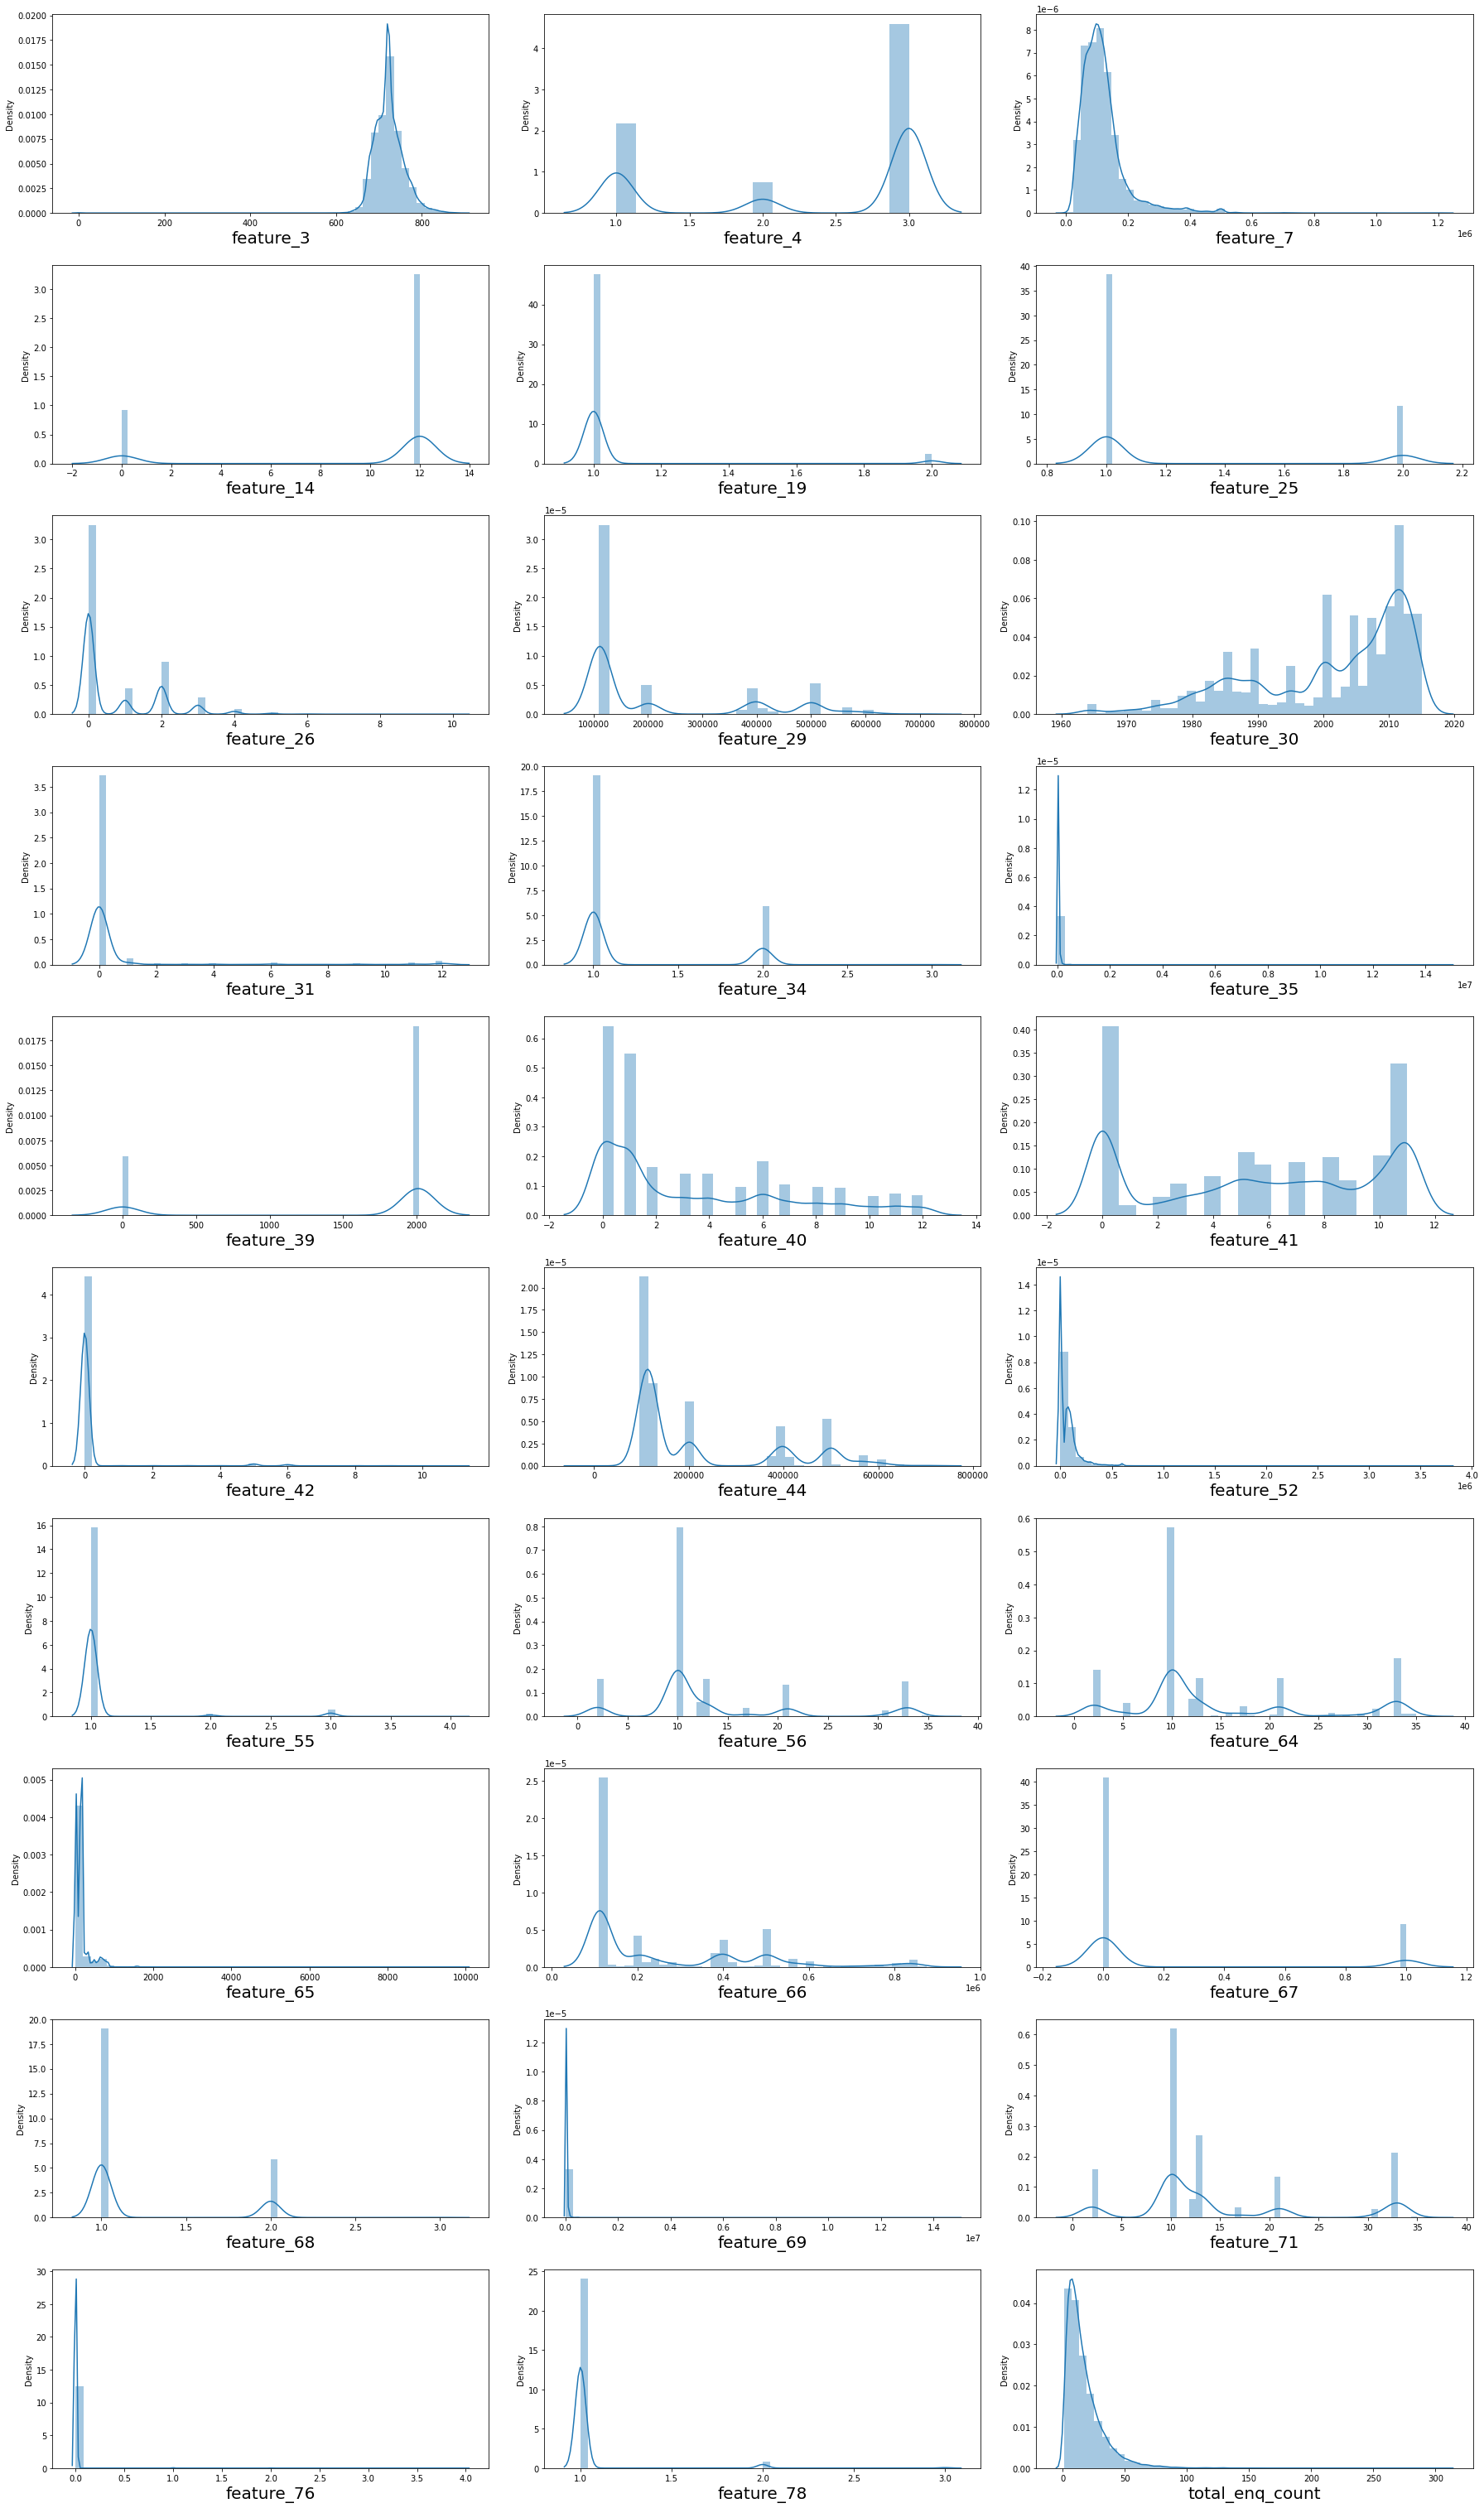

In [63]:
import warnings
warnings.filterwarnings("ignore")


plt.figure(figsize=(25,50), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in nd_1:
    if plotnumber<=35 :
        ax = plt.subplot(12,3,plotnumber)
        sns.distplot(x=nd_1[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show ()


### The distribution is not normal because there are many outliers in some features.


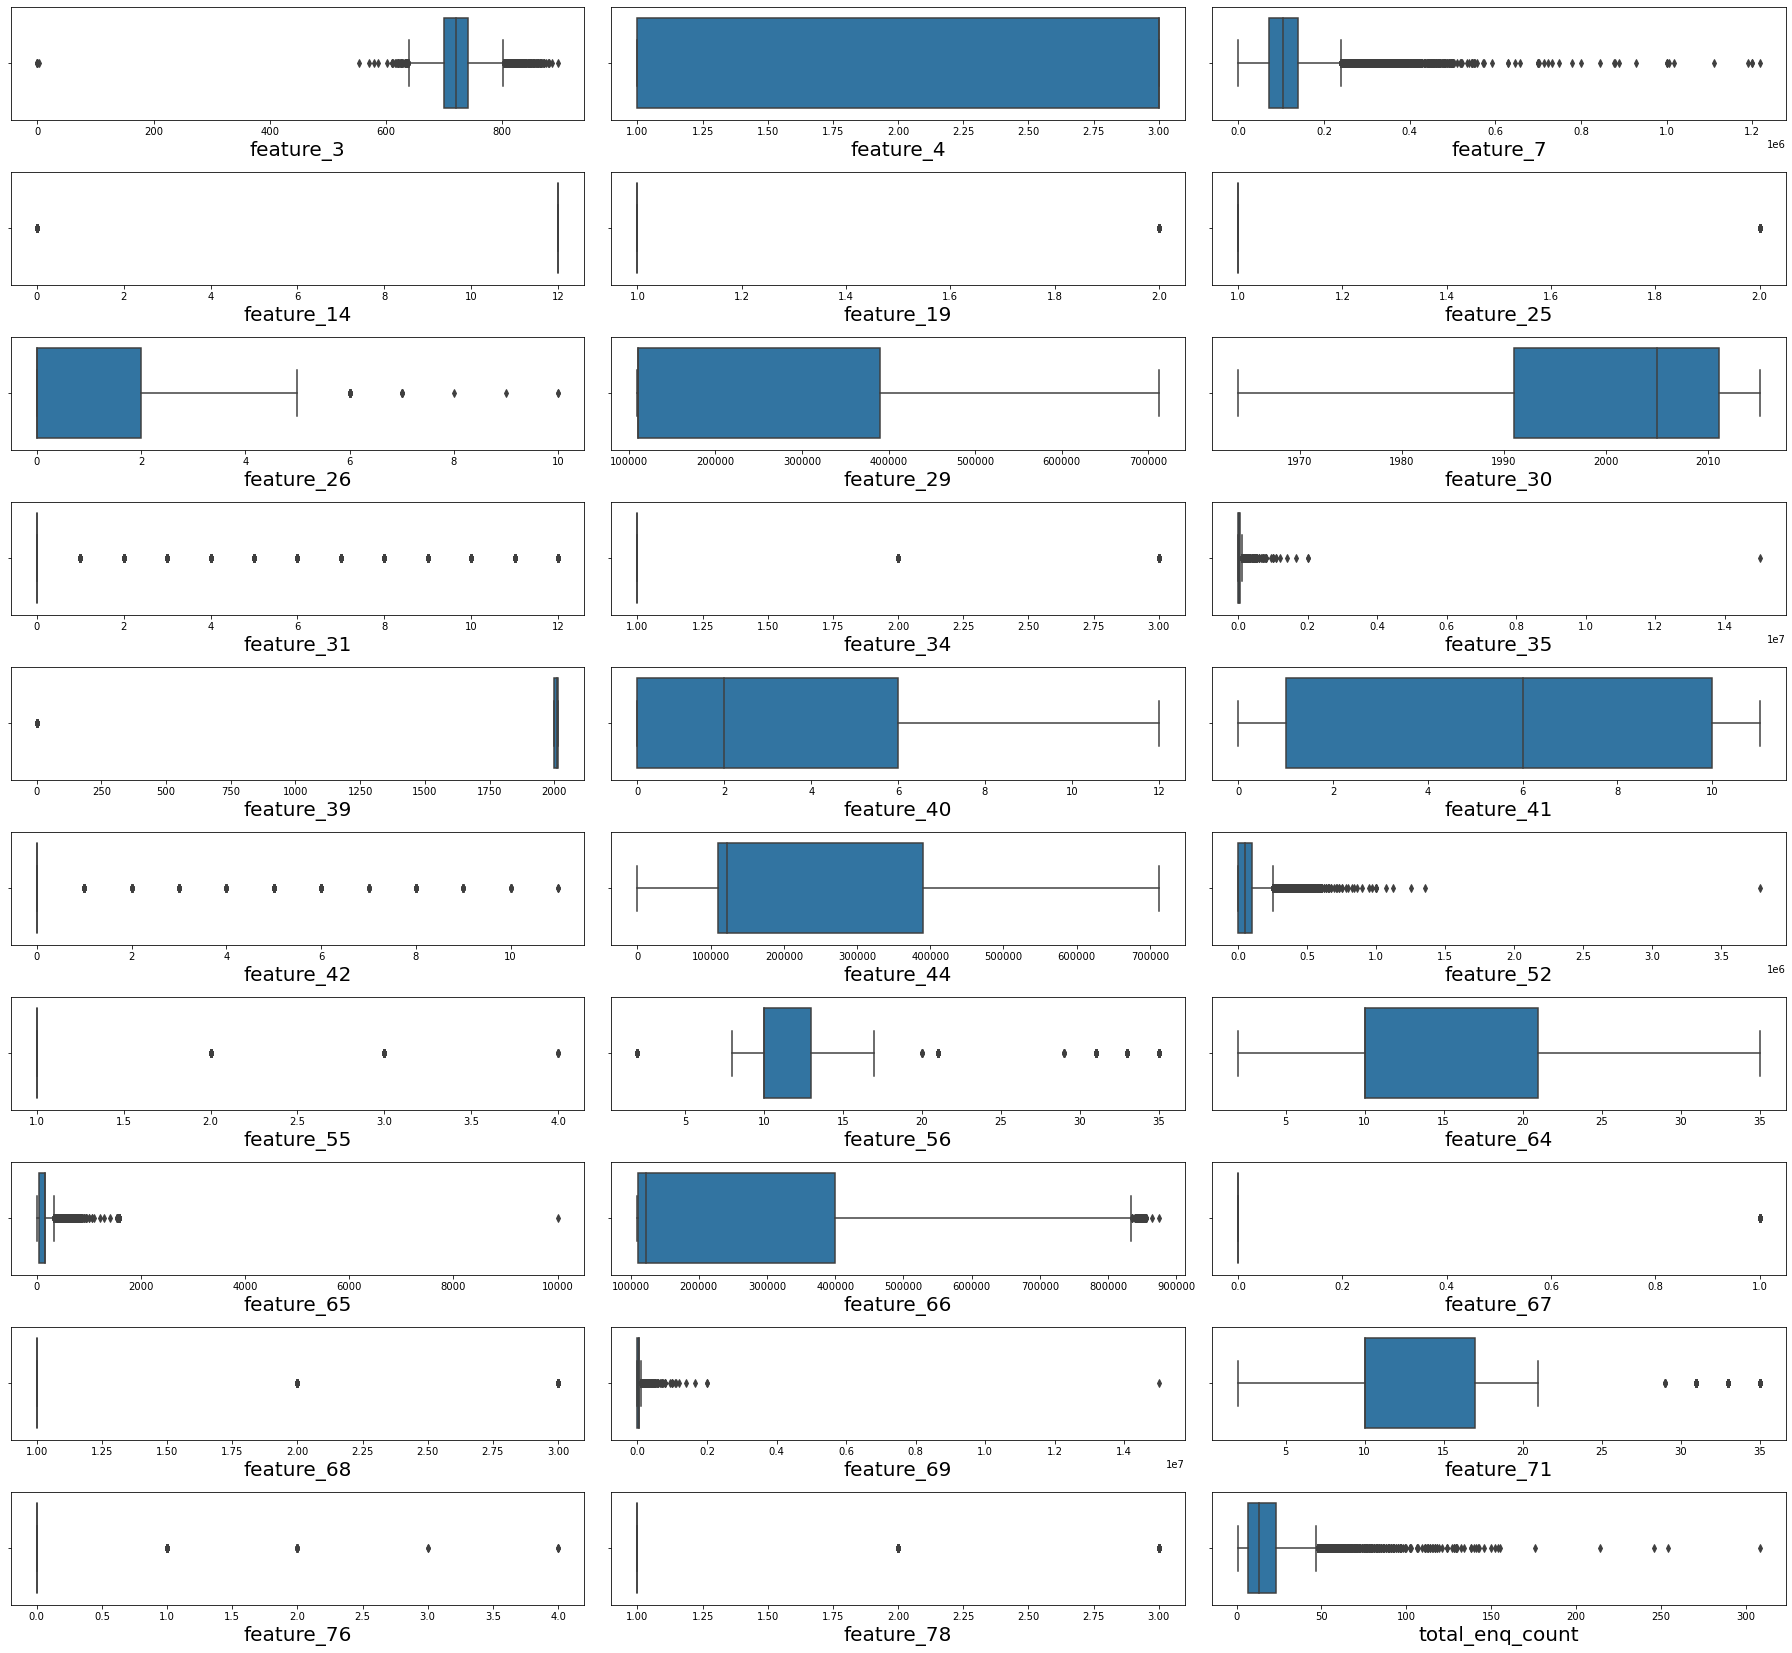

In [64]:
## boxplot to check outliers 

plt.figure(figsize=(25,50)) # defining canvas size
plotnum = 1 # counter

for column in nd_1: # iteration of columns / acessing the columns from  dataset 
    if plotnum<=35:    # set the limit
        plt.subplot(22,3,plotnum) # # plotting  graphs (5-rows,3-columns) and plotnumber is for count
        sns.boxplot(x = nd_1[column]) # Plotting box plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotnum+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

### We will handle the outliers in further data preprocessing steps.

## EXPLORATORY DATA ANALYSIS : B) CATEGORICAL FEATURES

In [65]:
cd.columns

Index(['feature_1', 'feature_2', 'feature_11', 'feature_12', 'feature_15',
       'feature_21', 'feature_23', 'feature_24', 'feature_27', 'feature_28',
       'feature_32', 'feature_33', 'feature_36', 'feature_37', 'feature_43',
       'feature_46', 'feature_48', 'feature_50', 'feature_58', 'feature_59',
       'feature_60', 'feature_62', 'feature_63', 'feature_70', 'feature_72',
       'feature_75', 'feature_79', 'high_credit_amt', 'cur_balance_amt',
       'cashlimit', 'creditlimit', 'total_enq_amt'],
      dtype='object')

In [66]:
cd_1=cd[['feature_1', 'feature_2', 'feature_11', 'feature_12', 'feature_15',
       'feature_21', 'feature_23', 'feature_24', 'feature_27', 'feature_28',
       'feature_32', 'feature_33', 'feature_36', 'feature_37', 'feature_43',
       'feature_46', 'feature_48', 'feature_50', 'feature_58', 'feature_59',
       'feature_60', 'feature_62', 'feature_63', 'feature_70', 'feature_72',
       'feature_75', 'feature_79', 'high_credit_amt', 'cur_balance_amt',
       'cashlimit', 'creditlimit', 'total_enq_amt']]

### Boxplot to check outliers :

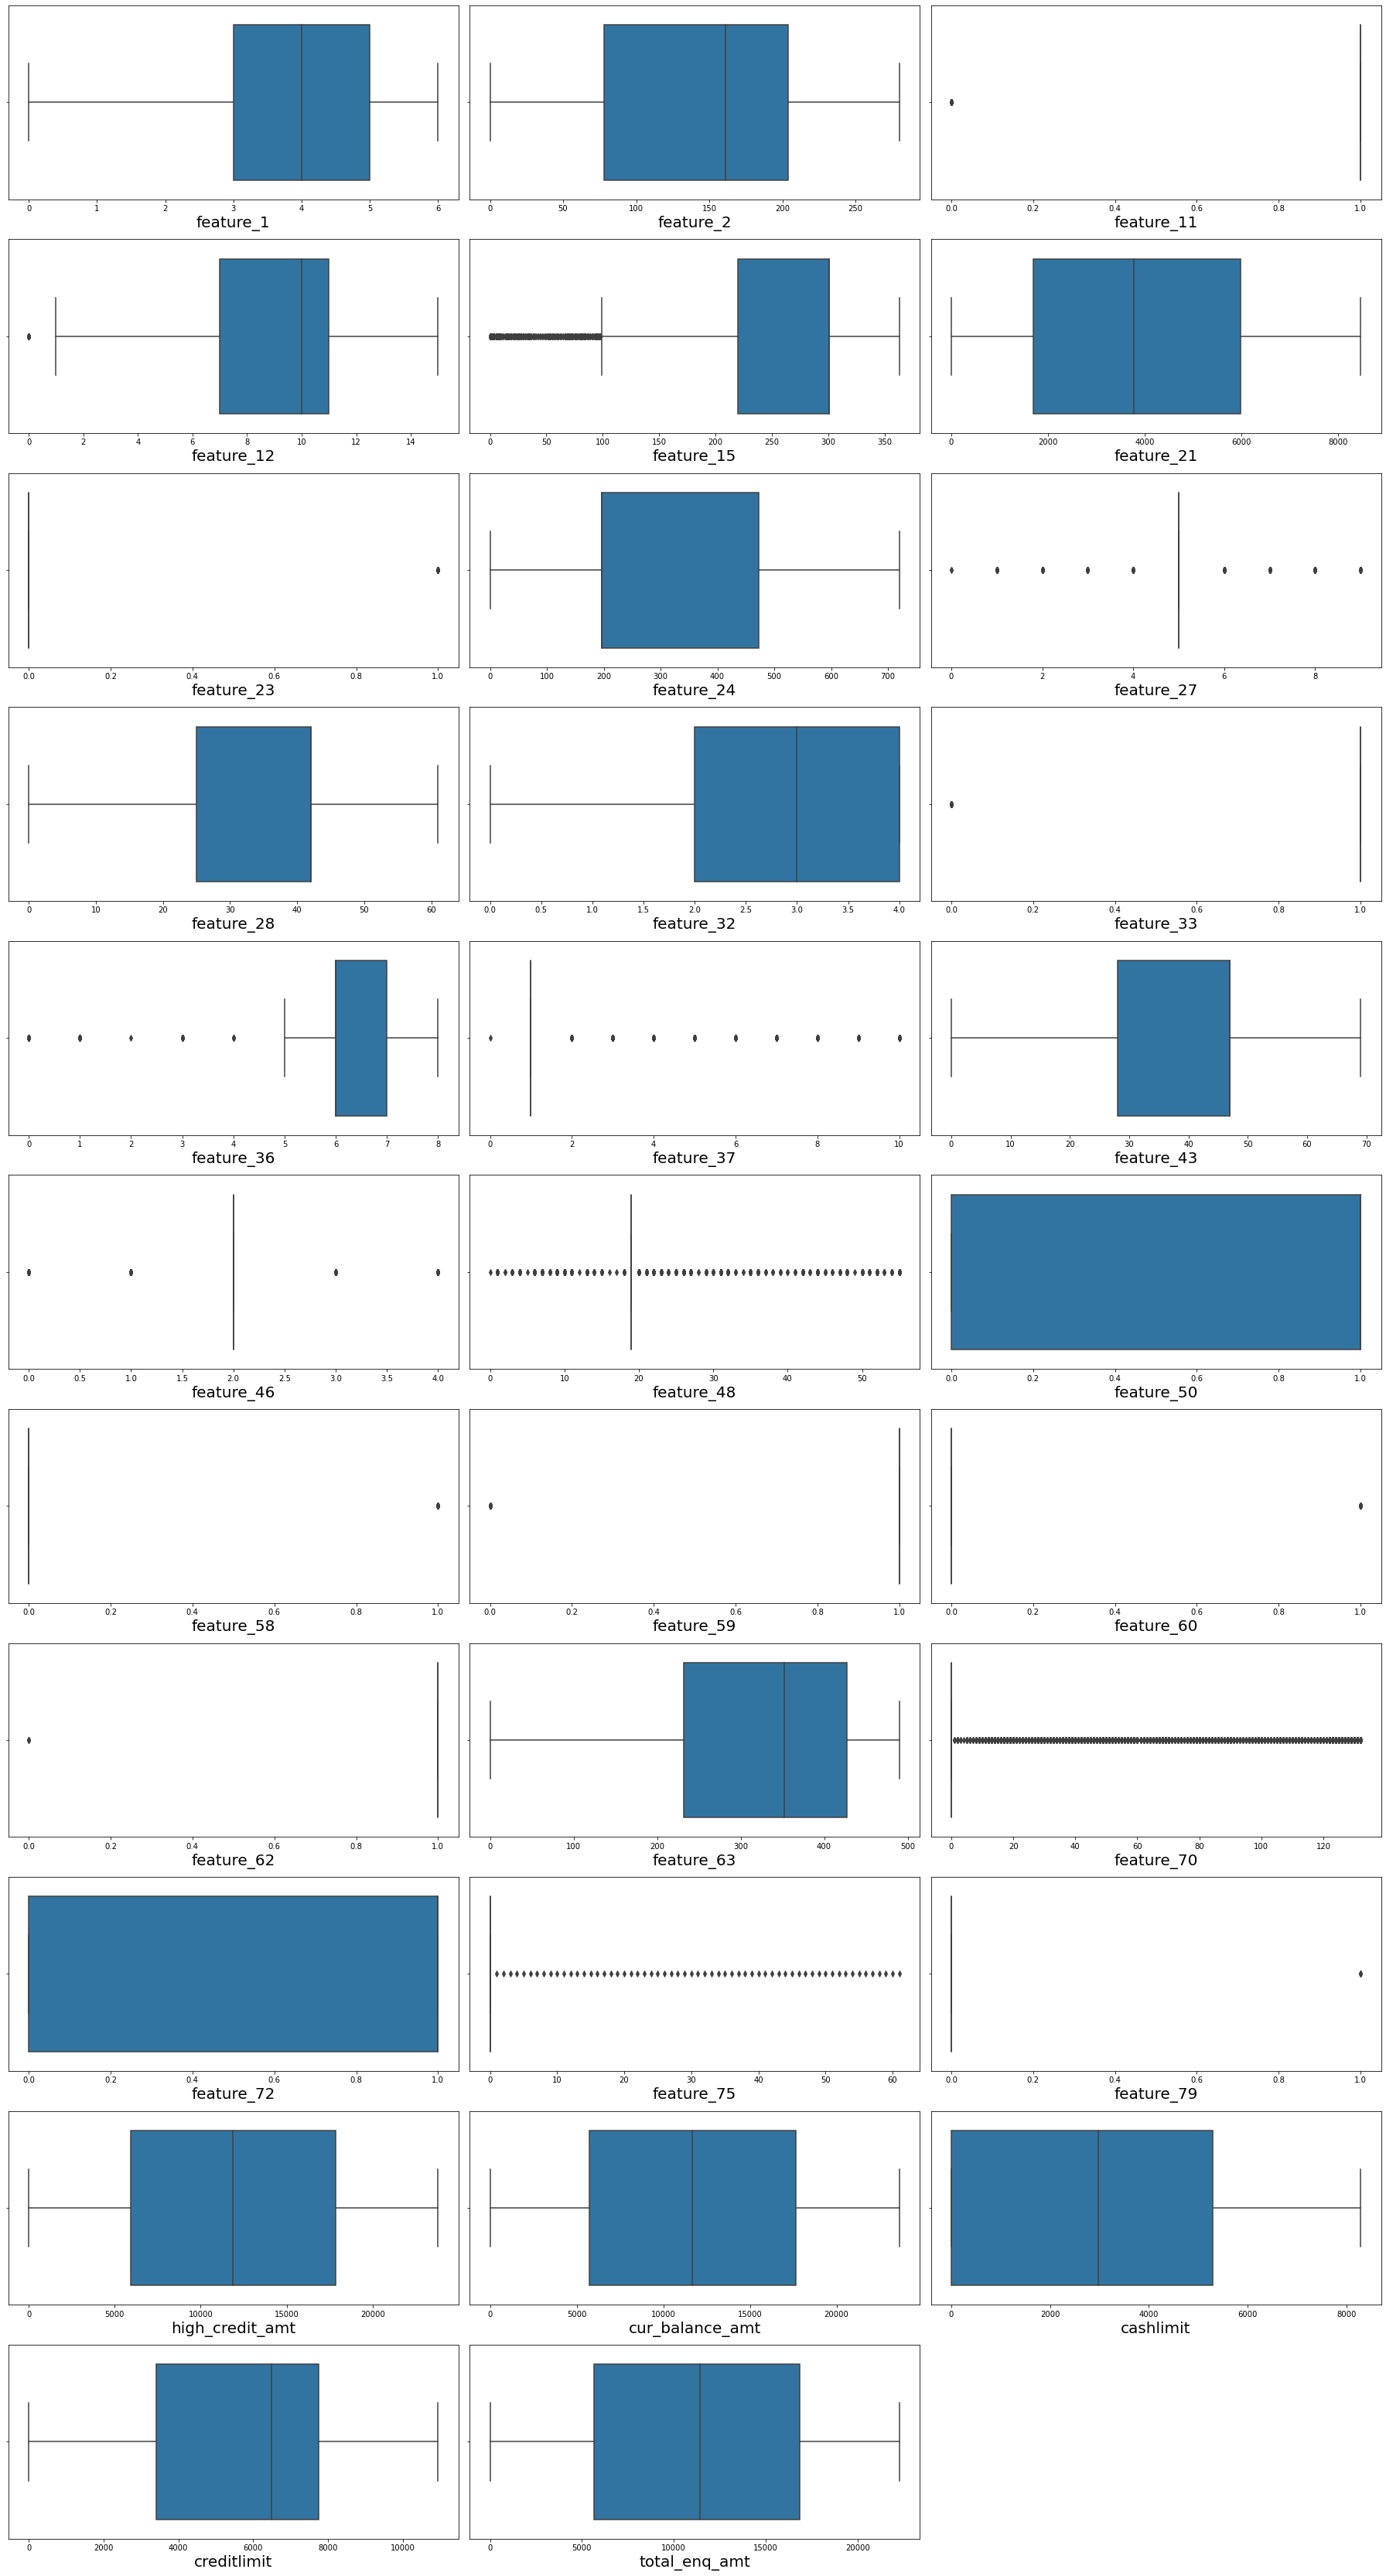

In [67]:
 plt.figure(figsize=(25,50)) # defining canvas size
plotnum = 1 # counter

for column in cd_1: # iteration of columns / acessing the columns from  dataset 
    if plotnum<=35:    # set the limit
        plt.subplot(12,3,plotnum) # # plotting  graphs (5-rows,3-columns) and plotnumber is for count
        sns.boxplot(x = cd_1[column]) # Plotting box plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotnum+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

### Data Exploration of target variable :

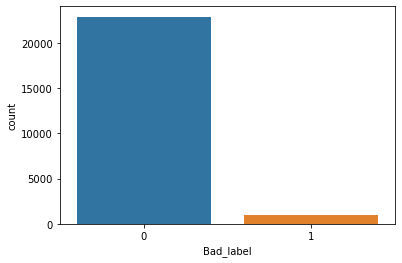

In [68]:
sns.countplot(data.Bad_label)
plt.show()

## Data is imbalanced

### The target variable is imbalanced. SMOTE is applied in further feature processing steps.

In [69]:
cd.isnull().sum()

feature_1          0
feature_2          0
feature_11         0
feature_12         0
feature_15         0
feature_21         0
feature_23         0
feature_24         0
feature_27         0
feature_28         0
feature_32         0
feature_33         0
feature_36         0
feature_37         0
feature_43         0
feature_46         0
feature_48         0
feature_50         0
feature_58         0
feature_59         0
feature_60         0
feature_62         0
feature_63         0
feature_70         0
feature_72         0
feature_75         0
feature_79         0
high_credit_amt    0
cur_balance_amt    0
cashlimit          0
creditlimit        0
total_enq_amt      0
dtype: int64

### To make final dataframe we will concat the numerical and categorical data that we had split earlier.

In [70]:
df=pd.concat([nd,cd],axis=1)

In [71]:
df.head()

,feature_3,feature_4,feature_7,feature_14,feature_19,feature_25,feature_26,feature_29,feature_30,feature_31,feature_34,feature_35,feature_39,feature_40,feature_41,feature_42,feature_44,feature_52,feature_55,feature_56,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_76,feature_78,total_enq_count,feature_1,feature_2,feature_11,feature_12,feature_15,feature_21,feature_23,feature_24,feature_27,feature_28,feature_32,feature_33,feature_36,feature_37,feature_43,feature_46,feature_48,feature_50,feature_58,feature_59,feature_60,feature_62,feature_63,feature_70,feature_72,feature_75,feature_79,high_credit_amt,cur_balance_amt,cashlimit,creditlimit,total_enq_amt
0,650.0,2.0,500000.0,0.0,1.0,1.0,2.0,400610.0,1965.0,0.0,2.0,90000.0,0.0,0.0,0.0,0.0,400059.0,0.0,1.0,21.0,21.0,15.0,400610.0,0.0,2.0,90000.0,21.0,0.0,1.0,18.0,1,108,1,3,25,936,0,473,5,39,4,1,6,1,43,2,50,1,1,1,0,1,1,130,1,0,0,9173,12616,2847,4429,14226
1,760.0,1.0,1200000.0,0.0,1.0,1.0,2.0,560042.0,1969.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,560042.0,0.0,1.0,17.0,17.0,12.0,560042.0,0.0,2.0,1.0,17.0,0.0,1.0,21.0,1,186,1,3,85,3966,0,196,5,9,4,1,6,1,6,2,50,0,1,1,0,1,13,130,1,0,0,13,20846,0,3,12165
2,774.0,1.0,700000.0,0.0,2.0,1.0,0.0,560042.0,1966.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,560042.0,0.0,3.0,17.0,17.0,12.0,560042.0,0.0,2.0,1.0,17.0,0.0,1.0,19.0,1,186,1,3,85,2676,0,511,5,9,4,1,6,1,6,2,19,0,0,1,0,1,4,130,1,0,0,2287,9519,2,6486,16475
3,770.0,1.0,500000.0,0.0,1.0,1.0,3.0,411001.0,1988.0,0.0,2.0,100000.0,0.0,0.0,0.0,0.0,411026.0,0.0,1.0,21.0,21.0,16.0,411001.0,0.0,2.0,100000.0,21.0,1.0,1.0,10.0,1,177,1,3,23,4468,0,603,5,45,4,1,6,1,51,2,50,1,1,1,0,1,185,130,1,50,0,15923,2830,3999,5708,2881
4,721.0,3.0,500000.0,0.0,1.0,1.0,3.0,122009.0,1995.0,0.0,2.0,300000.0,0.0,0.0,0.0,0.0,122009.0,0.0,1.0,13.0,13.0,3.0,122009.0,0.0,2.0,300000.0,13.0,0.0,1.0,14.0,1,175,1,3,2,763,0,473,5,23,4,1,6,1,28,2,50,0,1,1,0,1,256,130,1,0,0,4039,21954,2,6486,22176


In [72]:
df1=data['Bad_label']

In [73]:
df2=pd.DataFrame(df1)

In [74]:
d=pd.concat([df,df2],axis=1)

In [75]:
d.head()

,feature_3,feature_4,feature_7,feature_14,feature_19,feature_25,feature_26,feature_29,feature_30,feature_31,feature_34,feature_35,feature_39,feature_40,feature_41,feature_42,feature_44,feature_52,feature_55,feature_56,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_76,feature_78,total_enq_count,feature_1,feature_2,feature_11,feature_12,feature_15,feature_21,feature_23,feature_24,feature_27,feature_28,feature_32,feature_33,feature_36,feature_37,feature_43,feature_46,feature_48,feature_50,feature_58,feature_59,feature_60,feature_62,feature_63,feature_70,feature_72,feature_75,feature_79,high_credit_amt,cur_balance_amt,cashlimit,creditlimit,total_enq_amt,Bad_label
0,650.0,2.0,500000.0,0.0,1.0,1.0,2.0,400610.0,1965.0,0.0,2.0,90000.0,0.0,0.0,0.0,0.0,400059.0,0.0,1.0,21.0,21.0,15.0,400610.0,0.0,2.0,90000.0,21.0,0.0,1.0,18.0,1,108,1,3,25,936,0,473,5,39,4,1,6,1,43,2,50,1,1,1,0,1,1,130,1,0,0,9173,12616,2847,4429,14226,0
1,760.0,1.0,1200000.0,0.0,1.0,1.0,2.0,560042.0,1969.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,560042.0,0.0,1.0,17.0,17.0,12.0,560042.0,0.0,2.0,1.0,17.0,0.0,1.0,21.0,1,186,1,3,85,3966,0,196,5,9,4,1,6,1,6,2,50,0,1,1,0,1,13,130,1,0,0,13,20846,0,3,12165,0
2,774.0,1.0,700000.0,0.0,2.0,1.0,0.0,560042.0,1966.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,560042.0,0.0,3.0,17.0,17.0,12.0,560042.0,0.0,2.0,1.0,17.0,0.0,1.0,19.0,1,186,1,3,85,2676,0,511,5,9,4,1,6,1,6,2,19,0,0,1,0,1,4,130,1,0,0,2287,9519,2,6486,16475,0
3,770.0,1.0,500000.0,0.0,1.0,1.0,3.0,411001.0,1988.0,0.0,2.0,100000.0,0.0,0.0,0.0,0.0,411026.0,0.0,1.0,21.0,21.0,16.0,411001.0,0.0,2.0,100000.0,21.0,1.0,1.0,10.0,1,177,1,3,23,4468,0,603,5,45,4,1,6,1,51,2,50,1,1,1,0,1,185,130,1,50,0,15923,2830,3999,5708,2881,0
4,721.0,3.0,500000.0,0.0,1.0,1.0,3.0,122009.0,1995.0,0.0,2.0,300000.0,0.0,0.0,0.0,0.0,122009.0,0.0,1.0,13.0,13.0,3.0,122009.0,0.0,2.0,300000.0,13.0,0.0,1.0,14.0,1,175,1,3,2,763,0,473,5,23,4,1,6,1,28,2,50,0,1,1,0,1,256,130,1,0,0,4039,21954,2,6486,22176,0


In [76]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 63 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   feature_3        23896 non-null  float32
 1   feature_4        23896 non-null  float32
 2   feature_7        23896 non-null  float32
 3   feature_14       23896 non-null  float32
 4   feature_19       23896 non-null  float32
 5   feature_25       23896 non-null  float32
 6   feature_26       23896 non-null  float32
 7   feature_29       23896 non-null  float32
 8   feature_30       23896 non-null  float32
 9   feature_31       23896 non-null  float32
 10  feature_34       23896 non-null  float32
 11  feature_35       23896 non-null  float32
 12  feature_39       23896 non-null  float32
 13  feature_40       23896 non-null  float32
 14  feature_41       23896 non-null  float32
 15  feature_42       23896 non-null  float32
 16  feature_44       23896 non-null  float32
 17  feature_52  

In [77]:
# First converet the data-type of all feature because all feature data-type is object
d = d.astype('int64')

### Splitting the data into dependant and independant variable 

In [78]:
## Creating x and y 
x = d.drop(columns = ['Bad_label']) ## independent variable
y = d['Bad_label'] ## Dependent or target variable or the variable which we have to predict

## Feature Selection : 
#### ANOVA F-value feature selection technique is used for feature selection 

In [79]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2

In [80]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(x,y)

In [81]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [82]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [83]:
featureScores

,Specs,Score
0,feature_3,42.944488
1,feature_4,7.086366
2,feature_7,84.612906
3,feature_14,2.785935
4,feature_19,0.651045
5,feature_25,11.396876
6,feature_26,14.129157
7,feature_29,8.302781
8,feature_30,1.005463
9,feature_31,1.080016


In [84]:
print(featureScores.nlargest(20,'Score'))  #print 10 best features

              Specs      Score
47       feature_50  87.456798
2         feature_7  84.612906
17       feature_52  69.045496
0         feature_3  42.944488
59        cashlimit  29.713126
14       feature_41  16.059378
6        feature_26  14.129157
50       feature_60  12.103408
5        feature_25  11.396876
58  cur_balance_amt   8.942461
36       feature_23   8.627771
7        feature_29   8.302781
1         feature_4   7.086366
16       feature_44   7.034867
12       feature_39   6.514355
10       feature_34   6.255709
24       feature_68   6.255709
48       feature_58   5.733336
30        feature_1   5.022064
46       feature_48   4.836833


In [85]:
d.columns

Index(['feature_3', 'feature_4', 'feature_7', 'feature_14', 'feature_19',
       'feature_25', 'feature_26', 'feature_29', 'feature_30', 'feature_31',
       'feature_34', 'feature_35', 'feature_39', 'feature_40', 'feature_41',
       'feature_42', 'feature_44', 'feature_52', 'feature_55', 'feature_56',
       'feature_64', 'feature_65', 'feature_66', 'feature_67', 'feature_68',
       'feature_69', 'feature_71', 'feature_76', 'feature_78',
       'total_enq_count', 'feature_1', 'feature_2', 'feature_11', 'feature_12',
       'feature_15', 'feature_21', 'feature_23', 'feature_24', 'feature_27',
       'feature_28', 'feature_32', 'feature_33', 'feature_36', 'feature_37',
       'feature_43', 'feature_46', 'feature_48', 'feature_50', 'feature_58',
       'feature_59', 'feature_60', 'feature_62', 'feature_63', 'feature_70',
       'feature_72', 'feature_75', 'feature_79', 'high_credit_amt',
       'cur_balance_amt', 'cashlimit', 'creditlimit', 'total_enq_amt',
       'Bad_label'],
      d

In [86]:
d.head()

,feature_3,feature_4,feature_7,feature_14,feature_19,feature_25,feature_26,feature_29,feature_30,feature_31,feature_34,feature_35,feature_39,feature_40,feature_41,feature_42,feature_44,feature_52,feature_55,feature_56,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_76,feature_78,total_enq_count,feature_1,feature_2,feature_11,feature_12,feature_15,feature_21,feature_23,feature_24,feature_27,feature_28,feature_32,feature_33,feature_36,feature_37,feature_43,feature_46,feature_48,feature_50,feature_58,feature_59,feature_60,feature_62,feature_63,feature_70,feature_72,feature_75,feature_79,high_credit_amt,cur_balance_amt,cashlimit,creditlimit,total_enq_amt,Bad_label
0,650,2,500000,0,1,1,2,400610,1965,0,2,90000,0,0,0,0,400059,0,1,21,21,15,400610,0,2,90000,21,0,1,18,1,108,1,3,25,936,0,473,5,39,4,1,6,1,43,2,50,1,1,1,0,1,1,130,1,0,0,9173,12616,2847,4429,14226,0
1,760,1,1200000,0,1,1,2,560042,1969,0,2,1,0,0,0,0,560042,0,1,17,17,12,560042,0,2,1,17,0,1,21,1,186,1,3,85,3966,0,196,5,9,4,1,6,1,6,2,50,0,1,1,0,1,13,130,1,0,0,13,20846,0,3,12165,0
2,774,1,700000,0,2,1,0,560042,1966,0,2,1,0,0,0,0,560042,0,3,17,17,12,560042,0,2,1,17,0,1,19,1,186,1,3,85,2676,0,511,5,9,4,1,6,1,6,2,19,0,0,1,0,1,4,130,1,0,0,2287,9519,2,6486,16475,0
3,770,1,500000,0,1,1,3,411001,1988,0,2,100000,0,0,0,0,411026,0,1,21,21,16,411001,0,2,100000,21,1,1,10,1,177,1,3,23,4468,0,603,5,45,4,1,6,1,51,2,50,1,1,1,0,1,185,130,1,50,0,15923,2830,3999,5708,2881,0
4,721,3,500000,0,1,1,3,122009,1995,0,2,300000,0,0,0,0,122009,0,1,13,13,3,122009,0,2,300000,13,0,1,14,1,175,1,3,2,763,0,473,5,23,4,1,6,1,28,2,50,0,1,1,0,1,256,130,1,0,0,4039,21954,2,6486,22176,0


In [87]:
## As there are many features, to reduce dimensions we wil choose best 20 features 

X=d[['feature_3','feature_25','feature_26','feature_29','feature_34','feature_39',
     'feature_41','feature_52', 'feature_68','cashlimit','feature_23','feature_4','feature_58',
    'feature_1','feature_48','cur_balance_amt','feature_7','feature_44','feature_50','feature_60']]
y=d['Bad_label'] 

## Feature Scaling :
### Scaling the data using Robust Scaler as it robust to ouliers.

In [88]:
from sklearn.preprocessing import RobustScaler
scale = RobustScaler()
X_scaled=scale.fit_transform(X)


## Train-test-split :

In [89]:
## Train-test-split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=42)

## SMOTE to balance the data

In [90]:
## SMOTE to balance the data

# Apply SMOTE to balance the data
from imblearn.over_sampling import SMOTE
smote = SMOTE() ## object creation

In [91]:
x_train_smote, y_train_smote = smote.fit_resample(x_train,y_train)

In [92]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_train_smote))

Actual Classes Counter({0: 17153, 1: 769})
SMOTE Classes Counter({0: 17153, 1: 17153})


## ALGORITHMS APPLIED :

1. Logistic Regression
2. Decision tree
3. Random Forest
4. XGBoost
5. Neural Network 
7. KNN
8. SVC

## 1. Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()#object creation of logistic regression
    
LR.fit(x_train_smote,y_train_smote)#training model with training data

y_train_LR=LR.predict(x_train_smote)
y_test_LR=LR.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report,f1_score
print("Train accuracy :",accuracy_score(y_train_smote,y_train_LR))
print("Test accuracy :",accuracy_score(y_test,y_test_LR))

Train accuracy : 0.6271497697195826
Test accuracy : 0.5960830264479411


In [94]:
print(classification_report(y_test,y_test_LR))

              precision    recall  f1-score   support

           0       0.97      0.60      0.74      5739
           1       0.05      0.56      0.10       235

    accuracy                           0.60      5974
   macro avg       0.51      0.58      0.42      5974
weighted avg       0.93      0.60      0.71      5974



In [95]:
from sklearn.metrics import confusion_matrix
cm_LR=pd.crosstab(y_test,y_test_LR)
cm_LR

col_0,0,1
Bad_label,,
0,3430,2309
1,104,131


In [96]:
#hyper parameter tuning for logistic regression

param=[
    {'penalty':['l1','l2','elasticnet','none'],
     'C' : [1, 10, 100, 0.1, 0.001],
     'solver' : ['lbfgs','liblinear','sag','saga']
        
    }
]

In [97]:
from sklearn.model_selection import GridSearchCV
grid_LR=GridSearchCV(LR,param_grid=param,cv=10,n_jobs=-1)

In [98]:
grid_LR.fit(x_train_smote,y_train_smote)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 0.1, 0.001],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'liblinear', 'sag', 'saga']}])

In [99]:
grid_LR.best_estimator_

LogisticRegression(C=10, penalty='none', solver='sag')

In [100]:
grid_LR.best_params_

{'C': 10, 'penalty': 'none', 'solver': 'sag'}

In [102]:
## Applying best parameters for logistic regression

LoR=LogisticRegression(C=10,penalty='none', solver= 'sag')

In [103]:
LoR.fit(x_train_smote,y_train_smote)

LogisticRegression(C=10, penalty='none', solver='sag')

In [104]:
y_LoR=LoR.predict(x_test)

In [105]:
print(classification_report(y_test,y_LoR))

              precision    recall  f1-score   support

           0       0.97      0.59      0.73      5739
           1       0.05      0.58      0.10       235

    accuracy                           0.59      5974
   macro avg       0.51      0.59      0.42      5974
weighted avg       0.94      0.59      0.71      5974



In [106]:
## There is no much difference in the scores after hyperpamater tuning

## 2. KNN 

In [107]:
## KNN ALGORITHM
## taking optimal k to determine how many nearest neighbors  to create
from sklearn.neighbors import KNeighborsClassifier

# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1,23):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_smote,y_train_smote)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test)) 
print(np.mean(pred_i != y_test))

0.3778038165383328


Text(0, 0.5, 'Error Rate')

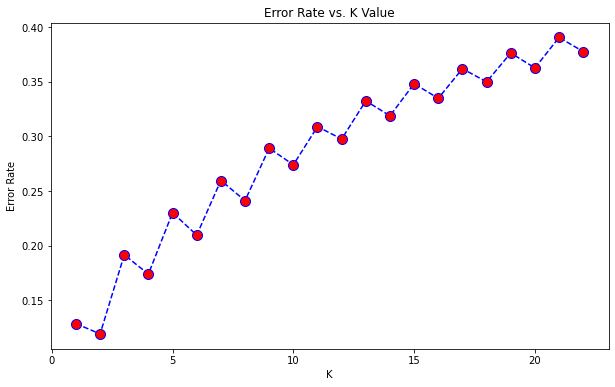

In [108]:
# The k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,23),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [109]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train_smote,y_train_smote)
y_pred_KNN = knn.predict(x_test)
y_pred_KNN

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [110]:
#accuracy score for KNN algorithm
print("The accuracy score is : ", accuracy_score(y_test,y_pred_KNN))

The accuracy score is :  0.8260796786072983


In [111]:
#classification report for KNN algorithm
print(classification_report(y_test,y_pred_KNN))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      5739
           1       0.05      0.21      0.09       235

    accuracy                           0.83      5974
   macro avg       0.51      0.53      0.50      5974
weighted avg       0.93      0.83      0.87      5974



In [112]:
cm_knn=pd.crosstab(y_test,y_pred_KNN)
cm_knn

col_0,0,1
Bad_label,,
0,4886,853
1,186,49


In [113]:
## Applying Hyper parameter tunning to KNN

grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

from sklearn.model_selection import GridSearchCV
KNN_gs = GridSearchCV(knn, grid_params, verbose = 1, cv=3, n_jobs = -1)


In [114]:
KNN_gs.fit(x_train_smote,y_train_smote)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=4), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [115]:
KNN_gs.best_estimator_

KNeighborsClassifier(metric='manhattan', weights='distance')

In [116]:
KNN_gs.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [117]:
## Applying best parameters 

knn_ht=KNeighborsClassifier(metric='manhattan', weights='distance')
KNN_gs.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [118]:
knn_ht.fit(x_train_smote,y_train_smote)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [119]:
y_knn=knn_ht.predict(x_test)

In [120]:
from sklearn.metrics import accuracy_score,classification_report,f1_score

print(classification_report(y_test,y_knn))


              precision    recall  f1-score   support

           0       0.96      0.85      0.90      5739
           1       0.05      0.19      0.08       235

    accuracy                           0.82      5974
   macro avg       0.51      0.52      0.49      5974
weighted avg       0.93      0.82      0.87      5974



## SVC model did not run due to less computational power, however code is included.

## 3. SVC

In [ ]:
#svc model
from sklearn.svm import SVC
svc = SVC(probability=False) ## base model with default parameters
svc.fit(x_train_smote,y_train_smote)
y_train_svc=svc.predict(x_train_smote)
y_test_svc=svc.predict(x_test)
print("Train accuracy :",accuracy_score(y_train_smote,y_train_svc))
print("Test accuracy :",accuracy_score(y_test,y_test_svc))

In [ ]:
print(classification_report(y_test,y_test_svc))

In [ ]:
cm_svc=pd.crosstab(y_test,y_test_svc)
cm_svc

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning  ## to avoid nan error or fit_estimator error 

from sklearn.model_selection import GridSearchCV

grid_svc = GridSearchCV(SVC(gamma='auto'),{
    'C':[1,10,20],
    'kernel':['rbf','linear']
}, cv=5, return_train_score=False)

grid_svc.fit(x_train_smote,y_train_smote)


In [ ]:
grid_svc.best_estimator_

In [ ]:
## Applying best parameters 
svc_HT=SVC(-------)
svc_HT.fit(x_train,y_train)
y_train_svh=grid_svc.predict(x_train)
y_test_svh=grid_svc.predict(x_test)
print("Train accuracy :",accuracy_score(y_train_smote,y_train_svh))
print("Test accuracy :",accuracy_score(y_test,y_test_svh))

In [ ]:
print(classification_report(y_test,y_test_svh))

In [ ]:
cm_svh=pd.crosstab(y_test,y_test_svh)
cm_svh

## 4. Decision tree

In [121]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()#object creation for decision tree  
dt.fit(x_train_smote,y_train_smote)#training the model
y_train_dt=dt.predict(x_train_smote)
y_test_dt=dt.predict(x_test)#prediction

from sklearn.metrics import accuracy_score,classification_report
print("Train accuracy :",accuracy_score(y_train_smote,y_train_dt))
print("Test accuracy :",accuracy_score(y_test,y_test_dt))

Train accuracy : 1.0
Test accuracy : 0.8880147304988283


In [122]:
print(classification_report(y_test,y_test_dt))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      5739
           1       0.06      0.12      0.08       235

    accuracy                           0.89      5974
   macro avg       0.51      0.52      0.51      5974
weighted avg       0.93      0.89      0.91      5974



In [123]:
cm_dt=pd.crosstab(y_test,y_test_dt)
cm_dt

col_0,0,1
Bad_label,,
0,5276,463
1,206,29


### Note : Due to less computational power hyper parameter tuning of this algorithms did not run. Code of tuning is included, but while applying best parameters in model creation , the parameters aren't feeded. Hence, in code, best parameters are left blank.

In [ ]:
#hyper parameter tuning for decision tree
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


In [ ]:
from sklearn.model_selection import GridSearchCV
grd=GridSearchCV(dt,param_grid=params,cv=10,n_jobs=-1)

In [ ]:
grd.fit(x_train_smote,y_train_smote)

In [ ]:
grd.best_estimator_

In [ ]:
## Applying best parameters

DT=DecisionTreeClassifier(-------)

In [ ]:
DT.fit(x_train_smote,y_train_smote)

In [ ]:
y_dt=DT.predict(x_test)

In [ ]:
print(classification_report(y_test,y_dt))

In [ ]:
pd.crosstab(y_test,y_dt)# confusion matrix 

## 5. Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_smote,y_train_smote)
y_train_rf=rf.predict(x_train_smote)
y_test_rf=rf.predict(x_test)#prediction
print("Train accuracy :",accuracy_score(y_train_smote,y_train_rf))
print("Test accuracy :",accuracy_score(y_test,y_test_rf))

Train accuracy : 1.0
Test accuracy : 0.9581519919651824


In [125]:
print(classification_report(y_test,y_test_rf))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5739
           1       0.11      0.01      0.02       235

    accuracy                           0.96      5974
   macro avg       0.53      0.50      0.50      5974
weighted avg       0.93      0.96      0.94      5974



In [126]:
## confusion matrix
cm_rf=pd.crosstab(y_test,y_test_rf)
cm_rf

col_0,0,1
Bad_label,,
0,5722,17
1,233,2


 ## 6. XGBoost

In [127]:
import xgboost

In [128]:
## importing XG boost  algorithm
from xgboost import XGBClassifier#importing the model library
xgb=XGBClassifier() ## object creation
xgb.fit(x_train_smote,y_train_smote)# fitting the data
y_train_xgb=xgb.predict(x_train_smote)
y_test_xgb=xgb.predict(x_test)#prediction
print("Train accuracy :",accuracy_score(y_train_smote,y_train_xgb))
print("Test accuracy :",accuracy_score(y_test,y_test_xgb))

Train accuracy : 0.9830350376027517
Test accuracy : 0.9571476397723468


In [129]:
print(classification_report(y_test,y_test_xgb))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5739
           1       0.11      0.01      0.02       235

    accuracy                           0.96      5974
   macro avg       0.54      0.50      0.50      5974
weighted avg       0.93      0.96      0.94      5974



In [130]:
## confusion matrix
cm_xgb=pd.crosstab(y_test,y_test_xgb)
cm_xgb

col_0,0,1
Bad_label,,
0,5715,24
1,232,3


### Hyper parameter tuning of xgboost and random forest is not done because accuracy of these models is above 95%

## 7. Neural Network

In [131]:
## model creation
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier( hidden_layer_sizes=(50,3),
                       learning_rate_init=0.1,
                       max_iter=100,
                       random_state=42) ## model object creation max_iter=Stopping parameter
MLP.fit(x_train_smote,y_train_smote) ## training the data
y_test_proba = MLP.predict_proba(x_test) 
y_test_mlp = MLP.predict(x_test)
y_train_mlp = MLP.predict(x_train_smote)
print("Train accuracy :",accuracy_score(y_train_smote,y_train_mlp))
print("Test accuracy :",accuracy_score(y_test,y_test_mlp))

Train accuracy : 0.7071940768378709
Test accuracy : 0.4315366588550385


In [132]:
print(classification_report(y_test,y_test_mlp))

              precision    recall  f1-score   support

           0       0.97      0.42      0.59      5739
           1       0.05      0.71      0.09       235

    accuracy                           0.43      5974
   macro avg       0.51      0.56      0.34      5974
weighted avg       0.94      0.43      0.57      5974



In [133]:
## confusion matrix
cm_mlp=pd.crosstab(y_test,y_test_mlp)
cm_mlp

col_0,0,1
Bad_label,,
0,2412,3327
1,69,166


## ACCURACY OF EVERY ALGORITHM 

In [134]:
from tabulate import tabulate

D=[[1,"Logistic Reg",0.59],
   [2,"Decision tree", 0.89],
   [3,"Random Forest", 0.96],
   [4,"XGboost", 0.96],
   [5,"Neural Network", 0.43],
   [6,"KNN", 0.83]]

print (tabulate(D, headers=['Sr_No','ML_Algorithm','Accuracy']))

  Sr_No  ML_Algorithm      Accuracy
-------  --------------  ----------
      1  Logistic Reg          0.59
      2  Decision tree         0.89
      3  Random Forest         0.96
      4  XGboost               0.96
      5  Neural Network        0.43
      6  KNN                   0.83


### For this data set, the algorithms showing better performance are:
1. XGBoost
2. Random Forest

### Let's apply straified cross validation score to the performance of these algorithms

In [135]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skfold=StratifiedKFold(n_splits=10)

In [136]:
xgb_cv=cross_val_score(xgb,x,y,cv=skfold)
rf_cv=cross_val_score(rf,x,y,cv=skfold)

In [137]:
print("Cross val score for xgb:", xgb_cv)
print("Cross val score for rf:", rf_cv)

Cross val score for xgb: [0.95857741 0.95732218 0.95774059 0.95690377 0.95606695 0.95774059
 0.95814148 0.9577229  0.95814148 0.95814148]
Cross val score for rf: [0.958159   0.958159   0.95774059 0.95774059 0.95774059 0.95774059
 0.95814148 0.95814148 0.95814148 0.95814148]


In [138]:
r=np.mean(xgb_cv)
s=np.mean(rf_cv)
print("Mean of Cross val score for xgb:", r)
print("Mean of Cross val score for rf:", s)

Mean of Cross val score for xgb: 0.957649880641924
Mean of Cross val score for rf: 0.9579846261894213


In [139]:
import pandas as pd
from tabulate import tabulate

L={ 'Algorithms': ['Random Forest','XGBoost'],
     'Mean of Cross validation Scores': [0.9579,0.9576]}

df=pd.DataFrame(L)
df=pd.DataFrame(L,index=[1,2])
df

,Algorithms,Mean of Cross validation Scores
1,Random Forest,0.9579
2,XGBoost,0.9576


## XGBoost and random forest have almost equal accuracy and cross validation score.Best cross validation score is shown by random forest. Thus, random forest model is best suited for this data set followed by Random forest followed by xgboost.

## MODEL SAVING 

In [140]:
import pickle
filename="Bank_GoodCredit_model"
pickle.dump(rf,open(filename,'wb'))

In [143]:
## loading the model 
loaded_model=pickle.load(open(filename,'rb'))

In [144]:
## predicting on loaded model , let us pass the x_test 
loaded_model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## CHALLENGES FACED IN THE PROJECT : 
1. The inherent problem is the size and complexity of the data set, originally we have 40 features and also we have over 200000 entries.
2. PCA was applied for dimensionality reduction, but after applying algorithms, the accuracy was very low for all the algorithms.
3. Use of different feature selection techniques to select the appropriate features and reducing the size of the data frame in order to decrease the use of computational resources was done. Inspite of all these efforts, still there was not enough computational resources to run the hyper parameter tuning of decision tree algorithms.
4. For instance we tried running all the algorithms on consumer grade hi end CPU (i7-9750H) and even we tried running them on GPU (Nvidia GTX 1660Ti). We also tried using google colab. But the above mentioned specs were not having enough computational power to run the SVC algorithm.
5. In feature selection using chi2 as scoring function gave an error that input must be non-negative, to compute this error instead of chi2, f_classif scoring function was used.
6. As there were many missing values, Simple Imputer was used.
7. Label encoding was done using for loop, since there were many categorical features.
8. Many features had many outliers. Robust Scalar was used to handle outliers.